# 1) Assignment activity 1

## Document your planned analytical approach.

### 1. Has there been an adequate staff and capacity in the network?

### To find an answer to this question I will check how many people is working in each department, how long patients have to wait for their appointment, what is a duration of appointments. I will try to check the staff & capacity across different regions in UK and across different healthcare proffesional types.

### 2. What was actual utilization of resources?

### To answer this question I will check how count of appointments vary by month, region, appointment type. I will check what is the relationship between appointment status, type or mode and especially I will pay attention to the  appointments patients did not attend.

# 2) Assignment activity 2

## Prepare your workstation

In [1]:
# Import libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Functions:

# 1. Checking shape and data types in dataframe.

def inspect_df(df):
    
    print("Shape of the DataFrame:")
    print(df.shape)
    print("Data types of the DataFrame columns")
    print(df.dtypes)

# 2. Function to create a line plot.

def plot_line_chart(data, x_col, y_col, hue_col, title, xlabel='', ylabel='', figsize=(12, 8), marker='o', linewidth=2, rotation=45):
    
    plt.figure(figsize=figsize)
    sns.lineplot(data=data, x=x_col, y=y_col, hue=hue_col, marker=marker, linewidth=linewidth)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=16, pad=20)
    plt.xticks(rotation=rotation)
    plt.legend(title=hue_col)
    plt.tight_layout()
    plt.show()

### Import and sense-check actual_duration.csv file.

In [2]:
# Import CSV file.
ad = pd.read_csv('actual_duration.csv')
                    
# Print the DataFrame (five top rows)
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [3]:
# View the last 5 rows.
ad.tail()

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

In [4]:
# Using inspect_df function
inspect_df(ad)

Shape of the DataFrame:
(137793, 8)
Data types of the DataFrame columns
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [5]:
# Determine descriptive statistics and metadata
ad.describe()
ad.info()

# Checking columns names
ad.columns.values.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


['sub_icb_location_code',
 'sub_icb_location_ons_code',
 'sub_icb_location_name',
 'icb_ons_code',
 'region_ons_code',
 'appointment_date',
 'actual_duration',
 'count_of_appointments']

### Checking missing values and duplicates in ad data frame.

In [6]:
# Checking missing values
ad_missing_values = ad[ad.isna().any(axis=1)]

# Showing rows with missing values.
ad_missing_values.shape

(0, 8)

### Answer: There is no missing values in ad data frame.

In [7]:
# Showing duplicates
ad_duplicates = ad.duplicated()

print(ad_duplicates)
print( "Sum of duplicates")
print(ad_duplicates.sum())

0         False
1         False
2         False
3         False
4         False
          ...  
137788    False
137789    False
137790    False
137791    False
137792    False
Length: 137793, dtype: bool
Sum of duplicates
0


In [8]:
# Show all duplicate rows
ad_duplicate_rows = ad_duplicates[ad_duplicates.duplicated(keep=False)]

print(ad_duplicate_rows)
print( "Sum of duplicated rows")
print(ad_duplicate_rows.sum())

0         False
1         False
2         False
3         False
4         False
          ...  
137788    False
137789    False
137790    False
137791    False
137792    False
Length: 137793, dtype: bool
Sum of duplicated rows
0


### Answer: There is no duplicates in ad data frame.

### Import and sense-check appointments_regional.csv file.

In [3]:
# Read the CSV file.
# Use the pd.read_csv() function.
# Specify the name of the CSV file.
ar = pd.read_csv('appointments_regional.csv')
                    
# Print the DataFrame (five top rows)
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [10]:
# View the last 5 rows.
ar.tail()

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10

In [11]:
# Using inspect_df function
inspect_df(ar)

Shape of the DataFrame:
(596821, 7)
Data types of the DataFrame columns
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [12]:
# Determine descriptive statistics and metadata
ar.describe()
ar.info()
# Checking columns names
ar.columns.values.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


['icb_ons_code',
 'appointment_month',
 'appointment_status',
 'hcp_type',
 'appointment_mode',
 'time_between_book_and_appointment',
 'count_of_appointments']

### Checking missing values and duplicates in ar data frame.

In [13]:
# Checking missing values
ar_missing_values = ar[ar.isna().any(axis=1)]

# Showing rows with missing values.
ar_missing_values.shape

(0, 7)

### Answer: There is no missing values in ar data frame. 

In [14]:
# Showing duplicates
ar_duplicates = ar.duplicated()

print(ar_duplicates)
print( "Sum of duplicates")
print(ar_duplicates.sum())

0         False
1         False
2         False
3         False
4         False
          ...  
596816    False
596817     True
596818    False
596819    False
596820     True
Length: 596821, dtype: bool
Sum of duplicates
21604


In [15]:
# Find duplicated rows
ar_duplicates = ar[ar.duplicated()]

# Sort the DataFrame by all columns
ar_sorted = ar.sort_values(by=list(ar.columns))

# Filter the sorted DataFrame for duplicated rows
ar_duplicates_sorted = ar_sorted[ar_sorted.duplicated()]

# Display duplicated rows next to each other
ar_duplicates_sorted.head(10)

icb_ons_code appointment_month appointment_status hcp_type  \
505707    E54000008           2020-01           Attended       GP   
516594    E54000008           2020-01           Attended       GP   
522453    E54000008           2020-01           Attended       GP   
511261    E54000008           2020-01           Attended       GP   
505709    E54000008           2020-01           Attended       GP   
500976    E54000008           2020-01           Attended       GP   
522456    E54000008           2020-01           Attended       GP   
516598    E54000008           2020-01           Attended       GP   
500977    E54000008           2020-01           Attended       GP   
516599    E54000008           2020-01           Attended       GP   

       appointment_mode time_between_book_and_appointment  \
505707     Face-to-Face            Unknown / Data Quality   
516594     Face-to-Face            Unknown / Data Quality   
522453     Face-to-Face            Unknown / Data Quality   
511261     Face-to-Face            Unknown / Data Quality   
505709       Home Visit                    15  to 21 Days   
500976       Home Visit                       2 to 7 Days   
522456       Home Visit                       2 to 7 Days   
516598       Home Visit                    22  to 28 Days   
500977       Home Visit                     8  to 14 Days   
516599       Home Visit                     8  to 14 Days   

        count_of_appointments  
505707                      1  
516594                      1  
522453                      2  
511261                      3  
505709                      1  
500976                     10  
522456                    122  
516598                      4  
500977                      1  
516599                     11

### Answer: There is 21604 duplicates in ar data frame. Duplicated rows in many examples differ only in count_of_appointments column. However, I cannot see any column which include unique key so it is not possible to say that certain row definitely is unique. Going forward it is not possible to say that rows deffinitely are duplicated. That is why I assume that each row might be a separate entry even though vaules are exactly the same as in other rows. For this reason I did not remove duplicates.

### Importing and sense-check tweets.csv file.

In [4]:
# Read the CSV file.
# Use the pd.read_csv() function.
# Specify the name of the CSV file.
t = pd.read_csv('tweets.csv')
                    
# Print the DataFrame (five top rows)
t.head(3)

tweet_id                                    tweet_full_text  \
0  1567629223795527681  As Arkansas’ first Comprehensive Stroke Certif...   
1  1567582846612553728  RT @AndreaGrammer: Work-life balance is at the...   
2  1567582787070304256  RT @OntarioGreens: $10 billion can go a long w...   

                                      tweet_entities  tweet_entities_hashtags  \
0  {'hashtags': [{'text': 'Healthcare', 'indices'...              #Healthcare   
1  {'hashtags': [{'text': 'PremiseHealth', 'indic...  #PremiseHealth, #hiring   
2  {'hashtags': [{'text': 'Healthcare', 'indices'...              #Healthcare   

                                      tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 're...                    0   
1  {'iso_language_code': 'en', 'result_type': 're...                    2   
2  {'iso_language_code': 'en', 'result_type': 're...                   39   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en

In [17]:
# View the last 5 rows.
t.tail()

tweet_id                                    tweet_full_text  \
1169  1567583004209332227  RT @PotomacPhotonic: Potomac #Innovation Repor...   
1170  1567582945342267393  Not a cent towards workers who would like to a...   
1171  1567582936014241792  The @hfmaorg Region 9 presents "The Value of E...   
1172  1567582892892782592  Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...   
1173  1567582846847533058  RT @KimcoStaffing: Apply now to work for #Medi...   

                                         tweet_entities  \
1169  {'hashtags': [{'text': 'Innovation', 'indices'...   
1170  {'hashtags': [{'text': 'SKPoli', 'indices': [2...   
1171  {'hashtags': [{'text': 'webinar', 'indices': [...   
1172  {'hashtags': [{'text': 'bpt', 'indices': [30, ...   
1173  {'hashtags': [{'text': 'MediQuestStaffing', 'i...   

                                tweet_entities_hashtags  \
1169  #Innovation, #precisionFabrication, #Microfluidic   
1170                               #SKPoli, #healthcare   
1171                        #webinar, #ESG, #healthcare   
1172  #bpt, #physiotherapy, #HealthyNation, #healthc...   
1173  #MediQuestStaffing, #Hospital, #shift, #Newpor...   

                                         tweet_metadata  tweet_retweet_count  \
1169  {'iso_language_code': 'en', 'result_type': 're...                    1   
1170  {'iso_language_code': 'en', 'result_type': 're...                    0   
1171  {'iso_language_code': 'en', 'result_type': 're...                    0   
1172  {'iso_language_code': 'en', 'result_type': 're...                    0   
1173  {'iso_language_code': 'en', 'result_type': 're...                    2   

      tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
1169                     0            False            False         en  
1170                     1            False            False         en  
1171                     0            False            False         en  
1172                     5            False            False         en  
1173                     0            False            False         en

In [18]:
# Using inspect_df function
inspect_df(t)

Shape of the DataFrame:
(1174, 10)
Data types of the DataFrame columns
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


In [19]:
# Determine descriptive statistics and metadata
t.describe()
t.info()

# Checking columns names
t.columns.values.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


['tweet_id',
 'tweet_full_text',
 'tweet_entities',
 'tweet_entities_hashtags',
 'tweet_metadata',
 'tweet_retweet_count',
 'tweet_favorite_count',
 'tweet_favorited',
 'tweet_retweeted',
 'tweet_lang']

### Checking missing values in t data frame.

In [20]:
# Checking missing values
t_missing_values = t[t.isna().any(axis=1)]

# Showing rows with missing values.
t_missing_values.shape

# Showing rows with missing values
t_missing_values.head()

tweet_id                                    tweet_full_text  \
19  1567581972532174848  RT @NNOCuba: Quite a claim to infamy, @marcoru...   
27  1567581274088566785  RT @khaleejtimes: .@BurjeelHoldings, a private...   
28  1567581257823027201  RT @SoniaFurstenau: People in BC are dying of ...   
38  1567580783598075905  RT @ricochet_en: Health care in Canada is coll...   
40  1567580673682055168  RT @BambergHealth: Do you want to know about H...   

                                       tweet_entities tweet_entities_hashtags  \
19  {'hashtags': [], 'symbols': [], 'user_mentions...                     NaN   
27  {'hashtags': [], 'symbols': [], 'user_mentions...                     NaN   
28  {'hashtags': [], 'symbols': [], 'user_mentions...                     NaN   
38  {'hashtags': [], 'symbols': [], 'user_mentions...                     NaN   
40  {'hashtags': [], 'symbols': [], 'user_mentions...                     NaN   

                                       tweet_metadata  tweet_retweet_count  \
19  {'iso_language_code': 'en', 'result_type': 're...                    7   
27  {'iso_language_code': 'en', 'result_type': 're...                  207   
28  {'iso_language_code': 'en', 'result_type': 're...                   40   
38  {'iso_language_code': 'en', 'result_type': 're...                   72   
40  {'iso_language_code': 'en', 'result_type': 're...                    1   

    tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
19                     0            False            False         en  
27                     0            False            False         en  
28                     0            False            False         en  
38                     0            False            False         en  
40                     0            False            False         en

In [21]:
# Fill missing values with ''Unknown'
t.fillna('Unknown', inplace=True)

# Checking missing values again.
t_missing_values = t[t.isna().any(axis=1)]

# Showing rows with missing values.
t_missing_values.shape

(0, 10)

### Answer: All missing values were replaced with 'Unknown' and there is no more missing values in t data frame.

In [22]:
# Showing duplicates
t_duplicates = t.duplicated()

print(t_duplicates)
print( "Sum of duplicates")
print(t_duplicates.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1169    False
1170    False
1171    False
1172    False
1173    False
Length: 1174, dtype: bool
Sum of duplicates
0


In [23]:
# Show all duplicate rows
t_duplicate_rows = t_duplicates[t_duplicates.duplicated(keep=False)]

print(t_duplicate_rows)
print( "Sum of duplicated rows")
print(t_duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1169    False
1170    False
1171    False
1172    False
1173    False
Length: 1174, dtype: bool
Sum of duplicated rows
0


### Answer: There is no duplicates in t data frame.

### Importing and sense-check national_categories.xlsx file.

In [ ]:
# Read the Excel file.
# Use the pd.read_excel() function.
# Specify the name of the CSV file.
nc = pd.read_excel('national_categories.xlsx')
                    
# Print the DataFrame (five top rows)
nc.head()

In [25]:
# View the last 5 rows.
nc.tail()

appointment_date icb_ons_code           sub_icb_location_name  \
817389       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817390       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817391       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817392       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817393       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   

                  service_setting            context_type  \
817389  Extended Access Provision  Care Related Encounter   
817390  Extended Access Provision  Care Related Encounter   
817391  Extended Access Provision  Care Related Encounter   
817392  Extended Access Provision  Care Related Encounter   
817393  Extended Access Provision  Care Related Encounter   

                   national_category  count_of_appointments appointment_month  
817389   Unplanned Clinical Activity                     12           2022-06  
817390               Planned Clinics                      4           2022-06  
817391    Planned Clinical Procedure                     92           2022-06  
817392  General Consultation Routine                      4           2022-06  
817393    General Consultation Acute                     19           2022-06

In [26]:
# Using inspect_df function
inspect_df(nc)

Shape of the DataFrame:
(817394, 8)
Data types of the DataFrame columns
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [27]:
# Determine descriptive statistics and metadata
nc.describe()
nc.info()

# Checking columns names
nc.columns.values.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


['appointment_date',
 'icb_ons_code',
 'sub_icb_location_name',
 'service_setting',
 'context_type',
 'national_category',
 'count_of_appointments',
 'appointment_month']

### Checking missing values and duplicates in nc data frame.

In [28]:
# Checking missing values
nc_missing_values = nc[nc.isna().any(axis=1)]

# Showing rows with missing values.
nc_missing_values.shape

(0, 8)

### Answer: There is no missing values in nc data frame.

In [29]:
# Showing duplicates
nc_duplicates = nc.duplicated()

print(nc_duplicates)
print( "Sum of duplicates")
print(nc_duplicates.sum())

0         False
1         False
2         False
3         False
4         False
          ...  
817389    False
817390    False
817391    False
817392    False
817393    False
Length: 817394, dtype: bool
Sum of duplicates
0


In [30]:
# Show all duplicate rows
nc_duplicate_rows = nc_duplicates[nc_duplicates.duplicated(keep=False)]

print(nc_duplicate_rows)
print( "Sum of duplicated rows")
print(nc_duplicate_rows.sum())

0         False
1         False
2         False
3         False
4         False
          ...  
817389    False
817390    False
817391    False
817392    False
817393    False
Length: 817394, dtype: bool
Sum of duplicated rows
0


### Answer: There is no duplicates in nc data frame.

## Question 1: How many locations are there in the data set?

In [31]:
# Determine the number of locations.
print(ad['sub_icb_location_ons_code'].nunique())

106


## Question 2: What are the five locations with the highest number of records?

In [32]:
# Determine the top five locations based on record count.

# Group by 'sub_icb_location_ons_code' and find the maximum count of appointments for each location
max_counts = ad.groupby('sub_icb_location_name')['count_of_appointments'].max()

# Sort the values in descending order and get the top 5
top_5_locations = max_counts.nlargest(5)

print(top_5_locations)


sub_icb_location_name
NHS North East London ICB - A3A8R     15400
NHS North West London ICB - W2U3Z     13780
NHS North Central London ICB - 93C    11281
NHS South East London ICB - 72Q       11031
NHS Kent and Medway ICB - 91Q         11002
Name: count_of_appointments, dtype: int64


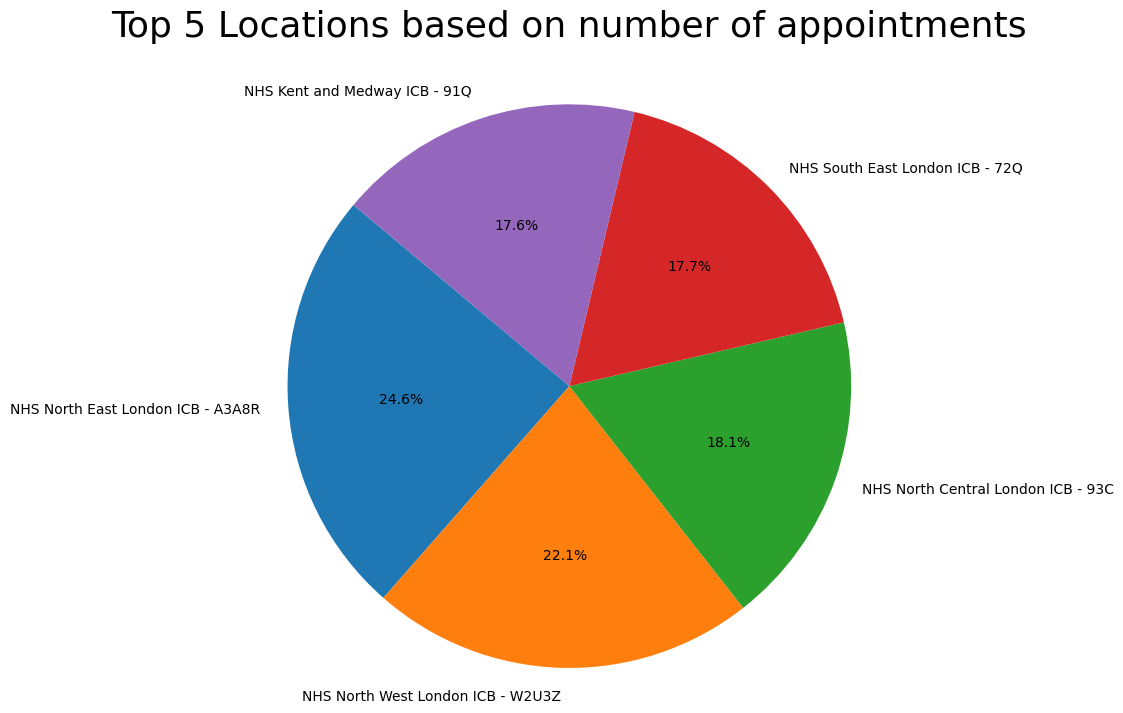

In [33]:
# Group by 'sub_icb_location_ons_code' and find the maximum count of appointments for each location
max_counts = ad.groupby('sub_icb_location_name')['count_of_appointments'].max()

# Sort the values in descending order and get the top 5
top_5_locations = max_counts.nlargest(5)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_locations, labels=top_5_locations.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Locations based on number of appointments', fontsize=26, pad=30)  # Increase font size and move title higher
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Question 3: How many service settings, context types, national categories, and appointment statuses are there?

In [34]:
# Determine the number of service settings.
num_unique_service_settings = nc['service_setting'].nunique()
print(num_unique_service_settings)

# Print service settings names.
unique_service_settings = nc['service_setting'].unique()
print(unique_service_settings)

5
['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


### Answer: There are 5 service settings: 'Primary Care Network' 'Other' 'General Practice' 'Unmapped' and 'Extended Access Provision'.

In [35]:
# Determine the number of context types.
num_unique_context_type = nc['context_type'].nunique()
print(num_unique_context_type)

# Print all the contex type names.
unique_context_type = nc['context_type'].unique()
print(unique_context_type)

3
['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']


### Answer: There are 3 contex types: 'Care Related Encounter' 'Unmapped' 'Inconsistent Mapping'. 

In [36]:
# Determine the number of national_category.
num_unique_national_category = nc['national_category'].nunique()
print(num_unique_national_category)

# Print all the national categories names.
unique_national_category = nc['national_category'].unique()
print(unique_national_category)

18
['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


### Answer: There are 18 national categories. All the names we can see above.

In [37]:
# Determine the number of appointment_status.
num_unique_appointment_status = ar['appointment_status'].nunique()

print(num_unique_appointment_status)

# Print all the appointment_status names.
unique_appointment_status = ar['appointment_status'].unique()
print(unique_appointment_status)

3
['Attended' 'DNA' 'Unknown']


### Answer: There are 3 appointment statuses: 'Attended' 'DNA' 'Unknown'.

## Question 4: Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?

### Answer: I think that columns containing location codes for example: sub_icb_location_code or sub_icb_location_ons_code does not help user in understanding the data about NHS.

# 3) Assignment activity 3

## Question 1: Between what dates were appointments scheduled?

In [38]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [39]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [4]:
# Change the format of ad['appointment_date'] to datetime.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

print(ad.dtypes)

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [5]:
# Determine the minimum and maximum dates in the ad DataFrame.

# Determine the minimum date in the ad DataFrame.
min_date = ad['appointment_date'].min()

# Determine the maximum date in the ad DataFrame.
max_date = ad['appointment_date'].max()

print("Minimum date ad:", min_date)
print("Maximum date ad:", max_date)

Minimum date ad: 2021-12-01 00:00:00
Maximum date ad: 2022-06-30 00:00:00


In [ ]:
# Determine the minimum and maximum dates in the nc DataFrame.

# Determine the minimum date in the ad DataFrame.
min_date = nc['appointment_date'].min()

# Determine the maximum date in the ad DataFrame.
max_date = nc['appointment_date'].max()

print("Minimum date nc:", min_date)
print("Maximum date nc:", max_date)


### Answer: Appointments were scheduled between 2021-08-01 and 2022-06-30.

## Question 2: Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [41]:
# Create new data frame with selected columns from nc Data Frame.
new_nc = nc.loc[:, ['service_setting', 'count_of_appointments', 'sub_icb_location_name', 'appointment_date']]
new_nc.head()

service_setting  count_of_appointments  \
0  Primary Care Network                      3   
1                 Other                      7   
2      General Practice                     79   
3      General Practice                    725   
4      General Practice                      2   

                        sub_icb_location_name appointment_date  
0  NHS North East and North Cumbria ICB - 00L       2021-08-02  
1  NHS North East and North Cumbria ICB - 00L       2021-08-02  
2  NHS North East and North Cumbria ICB - 00L       2021-08-02  
3  NHS North East and North Cumbria ICB - 00L       2021-08-02  
4  NHS North East and North Cumbria ICB - 00L       2021-08-02

In [42]:
# Filter rows that contains NHS North West London ICB - W2U3Z in their description.
north_west_rows = new_nc[new_nc['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3Z', case=False)]

north_west_rows

service_setting  count_of_appointments  \
794321                   Unmapped                    607   
794322                      Other                      6   
794323           General Practice                     47   
794324           General Practice                     74   
794325           General Practice                     98   
...                           ...                    ...   
807323  Extended Access Provision                      6   
807324  Extended Access Provision                     25   
807325  Extended Access Provision                    217   
807326  Extended Access Provision                    103   
807327           General Practice                     24   

                    sub_icb_location_name appointment_date  
794321  NHS North West London ICB - W2U3Z       2021-08-01  
794322  NHS North West London ICB - W2U3Z       2021-08-01  
794323  NHS North West London ICB - W2U3Z       2021-08-01  
794324  NHS North West London ICB - W2U3Z       2021-08-01  
794325  NHS North West London ICB - W2U3Z       2021-08-01  
...                                   ...              ...  
807323  NHS North West London ICB - W2U3Z       2022-06-30  
807324  NHS North West London ICB - W2U3Z       2022-06-30  
807325  NHS North West London ICB - W2U3Z       2022-06-30  
807326  NHS North West London ICB - W2U3Z       2022-06-30  
807327  NHS North West London ICB - W2U3Z       2022-06-30  

[13007 rows x 4 columns]

In [43]:
# Filter the 'appointment_date' column from 1 January to 1 June 2022.
new_nc_filtered = north_west_rows[(north_west_rows['appointment_date'] >= '2022-01-01') & (north_west_rows['appointment_date'] <= '2022-06-01')]

print("")
new_nc_filtered

service_setting  count_of_appointments  \
800289                   Unmapped                    496   
800290       Primary Care Network                     19   
800291                      Other                      1   
800292           General Practice                     16   
800293       Primary Care Network                     29   
...                           ...                    ...   
806220  Extended Access Provision                      4   
806221  Extended Access Provision                     27   
806222           General Practice                    626   
806223  Extended Access Provision                    224   
806224  Extended Access Provision                     96   

                    sub_icb_location_name appointment_date  
800289  NHS North West London ICB - W2U3Z       2022-01-01  
800290  NHS North West London ICB - W2U3Z       2022-01-01  
800291  NHS North West London ICB - W2U3Z       2022-01-01  
800292  NHS North West London ICB - W2U3Z       2022-01-01  
800293  NHS North West London ICB - W2U3Z       2022-01-01  
...                                   ...              ...  
806220  NHS North West London ICB - W2U3Z       2022-06-01  
806221  NHS North West London ICB - W2U3Z       2022-06-01  
806222  NHS North West London ICB - W2U3Z       2022-06-01  
806223  NHS North West London ICB - W2U3Z       2022-06-01  
806224  NHS North West London ICB - W2U3Z       2022-06-01  

[5936 rows x 4 columns]

In [44]:
# Determine number of appointments for each service setting.

most_popular = new_nc_filtered.groupby('service_setting').agg({'count_of_appointments': 'count', 'sub_icb_location_name': 'unique', 'appointment_date': 'unique'})

# View the output
most_popular

count_of_appointments  \
service_setting                                    
Extended Access Provision                   1090   
General Practice                            2104   
Other                                       1318   
Primary Care Network                        1272   
Unmapped                                     152   

                                         sub_icb_location_name  \
service_setting                                                  
Extended Access Provision  [NHS North West London ICB - W2U3Z]   
General Practice           [NHS North West London ICB - W2U3Z]   
Other                      [NHS North West London ICB - W2U3Z]   
Primary Care Network       [NHS North West London ICB - W2U3Z]   
Unmapped                   [NHS North West London ICB - W2U3Z]   

                                                            appointment_date  
service_setting                                                               
Extended Access Provision  [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...  
General Practice           [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...  
Other                      [2022-01-01 00:00:00, 2022-01-04 00:00:00, 202...  
Primary Care Network       [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...  
Unmapped                   [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...

In [45]:
# Show number of appointments in descending order.
most_popular_asc = most_popular.sort_values(by='count_of_appointments', ascending=False)

most_popular_asc

count_of_appointments  \
service_setting                                    
General Practice                            2104   
Other                                       1318   
Primary Care Network                        1272   
Extended Access Provision                   1090   
Unmapped                                     152   

                                         sub_icb_location_name  \
service_setting                                                  
General Practice           [NHS North West London ICB - W2U3Z]   
Other                      [NHS North West London ICB - W2U3Z]   
Primary Care Network       [NHS North West London ICB - W2U3Z]   
Extended Access Provision  [NHS North West London ICB - W2U3Z]   
Unmapped                   [NHS North West London ICB - W2U3Z]   

                                                            appointment_date  
service_setting                                                               
General Practice           [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...  
Other                      [2022-01-01 00:00:00, 2022-01-04 00:00:00, 202...  
Primary Care Network       [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...  
Extended Access Provision  [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...  
Unmapped                   [2022-01-01 00:00:00, 2022-01-02 00:00:00, 202...

###  Answer: Most popular service setting in NHS North West London ICB - W2U3Z from 1 January to 1 June 2022 is 'General Practice'.



## Question 3: Which month had the highest number of appointments?

In [46]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

# Group appointments by year and month, then sum appointments for each month
monthly_appointments = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month])['count_of_appointments'].sum()

# Sort the results by the count_of_appointments in descending order
monthly_appointments_sorted = monthly_appointments.sort_values(ascending=False)

# Extract the month with the highest number of appointments
highest_month = monthly_appointments_sorted.index[0]

print("Month with the highest number of appointments:")
print(highest_month)

Month with the highest number of appointments:
(2021, 11)


### Answer: The highest number of appointments were booked in November 2021.

## Question 4: What was the total number of records per month ?

Display the total number of records per month per data source.

### National category file

In [47]:
# Group appointments by month and count the number of appointments
num_appointments_nc = nc.groupby('appointment_month')['count_of_appointments'].count().reset_index()

# Rename the column
num_appointments_nc = num_appointments_nc.rename(columns={'count_of_appointments': 'Sum_of_appointments'})

print(num_appointments_nc)

   appointment_month  Sum_of_appointments
0            2021-08                69999
1            2021-09                74922
2            2021-10                74078
3            2021-11                77652
4            2021-12                72651
5            2022-01                71896
6            2022-02                71769
7            2022-03                82822
8            2022-04                70012
9            2022-05                77425
10           2022-06                74168


### Actual duration file

In [48]:
# Group appointments by month and count the number of appointments
num_appointments_ar = ar.groupby('appointment_month')['count_of_appointments'].count().reset_index()

# Rename the column
num_appointments_ar = num_appointments_ar.rename(columns={'count_of_appointments': 'Sum_of_appointments'})

print(num_appointments_ar)

   appointment_month  Sum_of_appointments
0            2020-01                20889
1            2020-02                20689
2            2020-03                21350
3            2020-04                19124
4            2020-05                18338
5            2020-06                18844
6            2020-07                19502
7            2020-08                19247
8            2020-09                20043
9            2020-10                20122
10           2020-11                19675
11           2020-12                19394
12           2021-01                19319
13           2021-02                18949
14           2021-03                19369
15           2021-04                19452
16           2021-05                19384
17           2021-06                19814
18           2021-07                19899
19           2021-08                19786
20           2021-09                20441
21           2021-10                20562
22           2021-11              

### Appointments duration file

In [51]:
# Convert 'appointment_date' column to datetime format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# Extract month and year from 'appointment_date'
ad['appointment_month'] = ad['appointment_date'].dt.month
ad['appointment_year'] = ad['appointment_date'].dt.year

# Group appointments by month and year, and count the number of appointments
num_appointments_ad = ad.groupby(['appointment_year', 'appointment_month'])['count_of_appointments'].sum().reset_index()

# Rename the column
num_appointments_ad = num_appointments_ad.rename(columns={'count_of_appointments': 'Sum_of_appointments'})

num_appointments_ad

appointment_year  appointment_month  Sum_of_appointments
0              2021                 12             22853483
1              2022                  1             23597196
2              2022                  2             23351939
3              2022                  3             27170002
4              2022                  4             21948814
5              2022                  5             25343941
6              2022                  6             23715317

# 4) Assignment activity 4

## Create visualisations and identify possible monthly and seasonal trends in the data

In [6]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [53]:
# Change the data type of the appointment month to string to allow for easier plotting.

# Convert appointment_month to string
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Verify the data type conversion
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


### Creating visualisation indicating the number of appointments per month for service settings.

In [54]:
# Create a new data frame.
service_setting_filtered = nc.groupby(['service_setting', 'appointment_month'])['count_of_appointments'].sum().reset_index(name='sum_of_appointments')
service_setting_filtered.head()

service_setting appointment_month  sum_of_appointments
0  Extended Access Provision           2021-08               160927
1  Extended Access Provision           2021-09               187906
2  Extended Access Provision           2021-10               209539
3  Extended Access Provision           2021-11               207577
4  Extended Access Provision           2021-12               173504

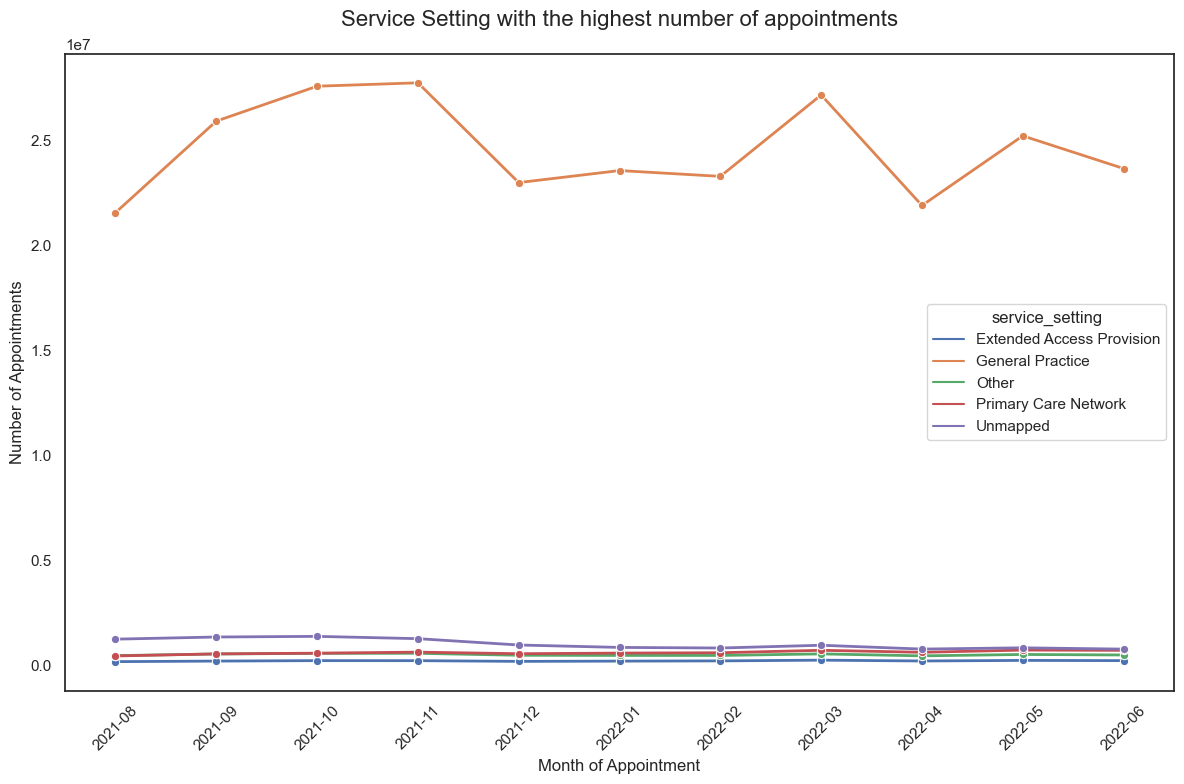

In [55]:
# Calling the plot_line_chart function
plot_line_chart(service_setting_filtered, 'appointment_month', 'sum_of_appointments', 'service_setting', 
                'Service Setting with the highest number of appointments', 
                xlabel='Month of Appointment', ylabel='Number of Appointments', 
                figsize=(12, 8), marker='o', linewidth=2, rotation=45)

### Answer: On this line plot we can see that from August 2021 to June 2022 GP had the highest number of appointments.

### Creating visualisation indicating the number of appointments per month for context type.

In [12]:
# Creating new data frame - context types by appointment month and by sum of record
context_type_filtered = nc.groupby(['context_type', 'appointment_month'])['count_of_appointments'].sum().reset_index(name='sum_of_appointments')
context_type_filtered

context_type appointment_month  sum_of_appointments
0   Care Related Encounter           2021-08             20255235
1   Care Related Encounter           2021-09             24404251
2   Care Related Encounter           2021-10             26125201
3   Care Related Encounter           2021-11             26282778
4   Care Related Encounter           2021-12             21798612
5   Care Related Encounter           2022-01             22441947
6   Care Related Encounter           2022-02             22211021
7   Care Related Encounter           2022-03             25928850
8   Care Related Encounter           2022-04             20904193
9   Care Related Encounter           2022-05             24101243
10  Care Related Encounter           2022-06             22621827
11    Inconsistent Mapping           2021-08              2363093
12    Inconsistent Mapping           2021-09              2782135
13    Inconsistent Mapping           2021-10              2811977
14    Inconsistent Mapping           2021-11              2865796
15    Inconsistent Mapping           2021-12              2387907
16    Inconsistent Mapping           2022-01              2353965
17    Inconsistent Mapping           2022-02              2332993
18    Inconsistent Mapping           2022-03              2723276
19    Inconsistent Mapping           2022-04              2248554
20    Inconsistent Mapping           2022-05              2573495
21    Inconsistent Mapping           2022-06              2447611
22                Unmapped           2021-08              1233843
23                Unmapped           2021-09              1336115
24                Unmapped           2021-10              1366656
25                Unmapped           2021-11              1256496
26                Unmapped           2021-12               954257
27                Unmapped           2022-01               839562
28                Unmapped           2022-02               811246
29                Unmapped           2022-03               942912
30                Unmapped           2022-04               760313
31                Unmapped           2022-05               820770
32                Unmapped           2022-06               758640

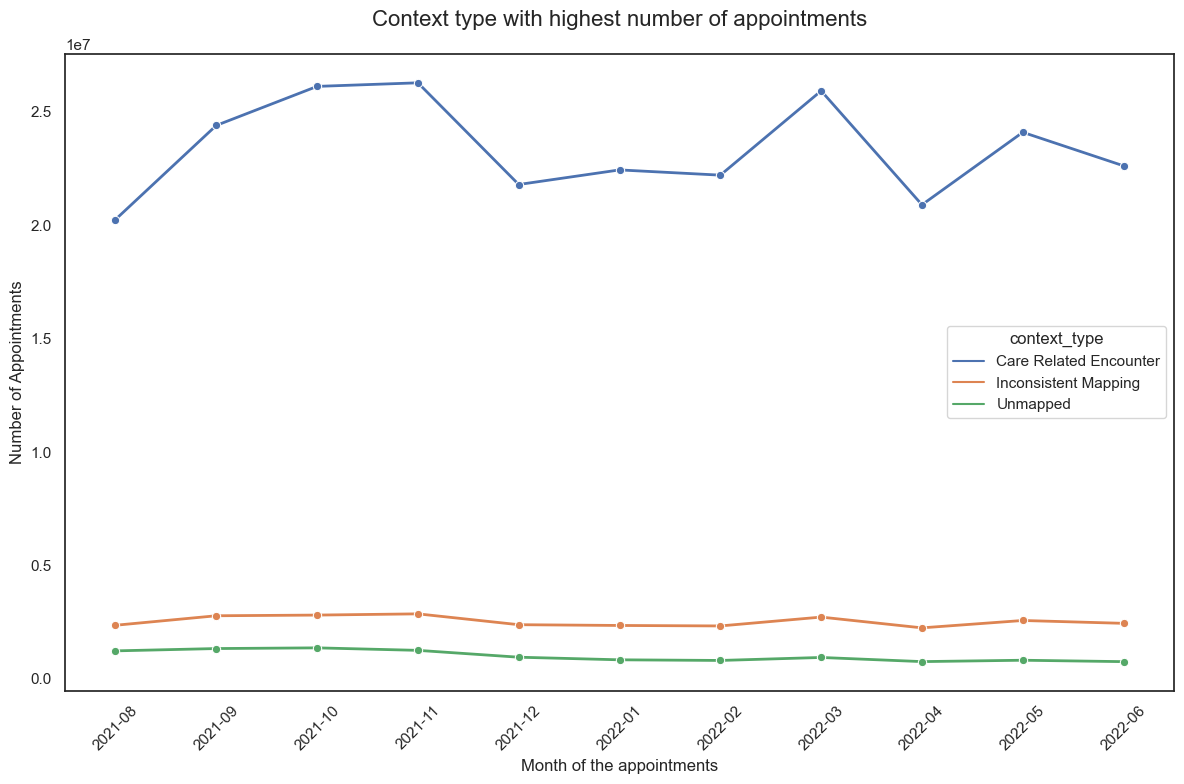

In [13]:
plot_line_chart(
    data=context_type_filtered,
    x_col='appointment_month',
    y_col='sum_of_appointments',
    hue_col='context_type',
    title='Context type with highest number of appointments',
    xlabel='Month of the appointments',
    ylabel='Number of Appointments',
    figsize=(12, 8),
    marker='o',
    linewidth=2,
    rotation=45
)  

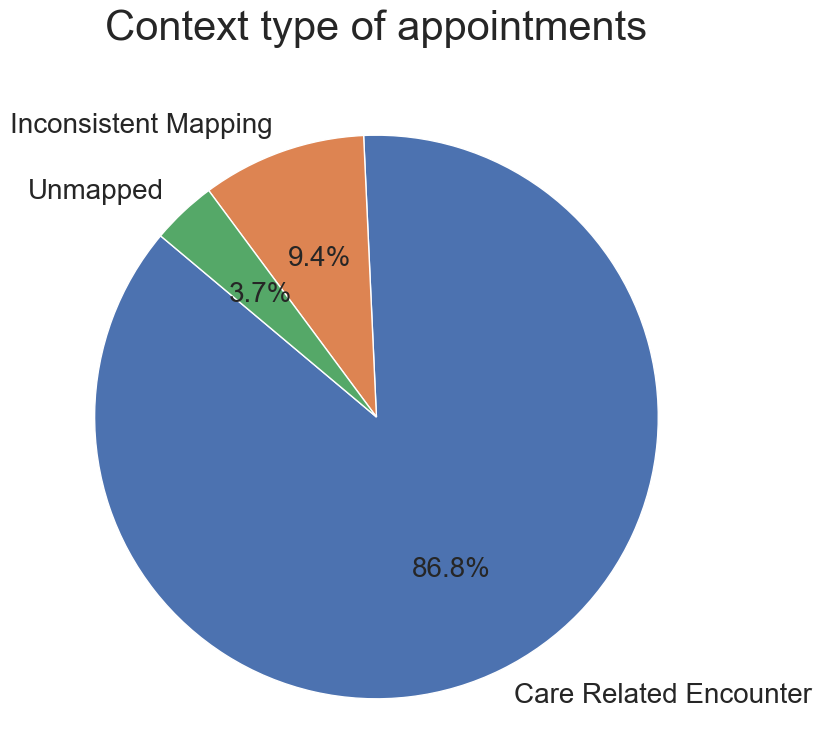

In [58]:
# Sum the appointments for each context type
context_type_sum = context_type_filtered.groupby('context_type')['sum_of_appointments'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(context_type_sum, labels=context_type_sum.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})
plt.title('Context type of appointments', fontsize=30, pad=50)  # Add padding to the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Answer: We can observe that Care Related Encounter had highest number of appointments from August 2021 till June 2022.

### Creating visualisation indicating the number of appointments per month for national category.

In [14]:
# Creating new data frame - national category by appointment month and by sum of appointments
national_category_filtered = nc.groupby(['national_category', 'appointment_month'])['count_of_appointments'].sum().reset_index(name='sum_of_appointments')
national_category_filtered

national_category appointment_month  \
0    Care Home Needs Assessment & Personalised Care...           2021-08   
1    Care Home Needs Assessment & Personalised Care...           2021-09   
2    Care Home Needs Assessment & Personalised Care...           2021-10   
3    Care Home Needs Assessment & Personalised Care...           2021-11   
4    Care Home Needs Assessment & Personalised Care...           2021-12   
..                                                 ...               ...   
193                                            Walk-in           2022-02   
194                                            Walk-in           2022-03   
195                                            Walk-in           2022-04   
196                                            Walk-in           2022-05   
197                                            Walk-in           2022-06   

     sum_of_appointments  
0                  29676  
1                  33503  
2                  32441  
3                  38827  
4                  34653  
..                   ...  
193                31665  
194                38070  
195                32346  
196                37687  
197                35935  

[198 rows x 3 columns]

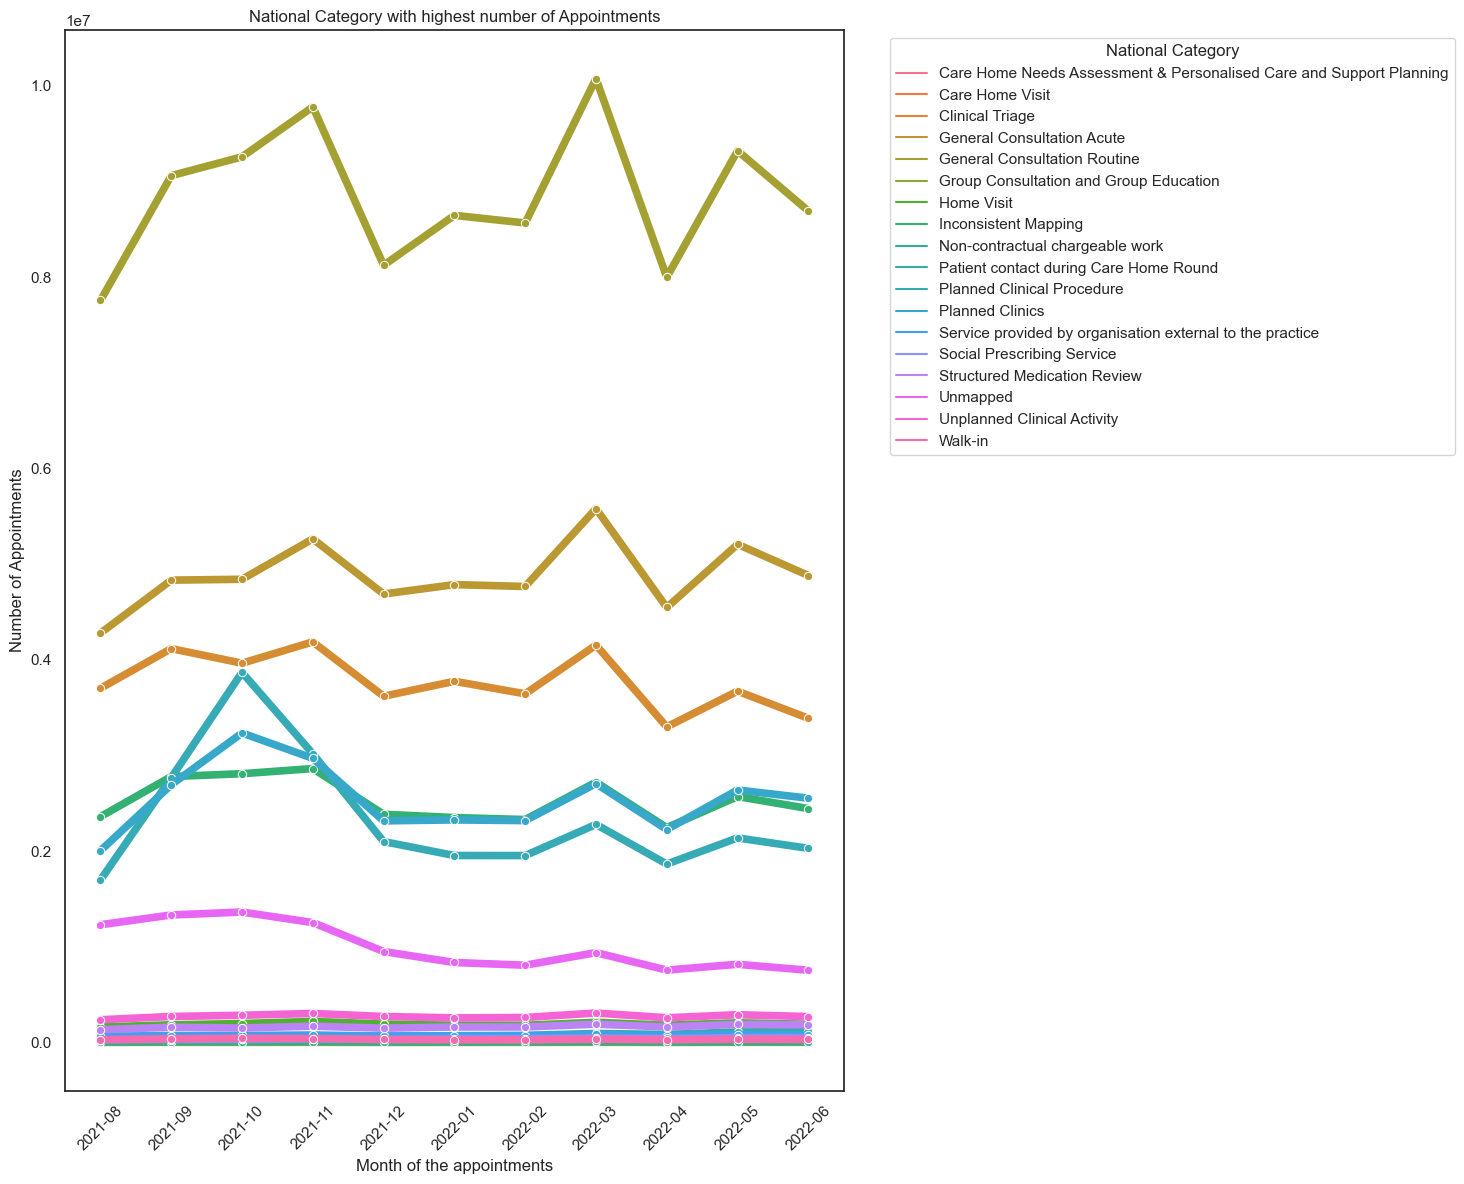

In [19]:
# Create a lineplot
plt.figure(figsize=(15, 12))
sns.lineplot(data=national_category_filtered, x='appointment_month', y='sum_of_appointments', hue='national_category',
             marker='o', linewidth=5.5)
plt.xlabel('Month of the appointments')
plt.ylabel('Number of Appointments')
plt.title('National Category with highest number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='National Category', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

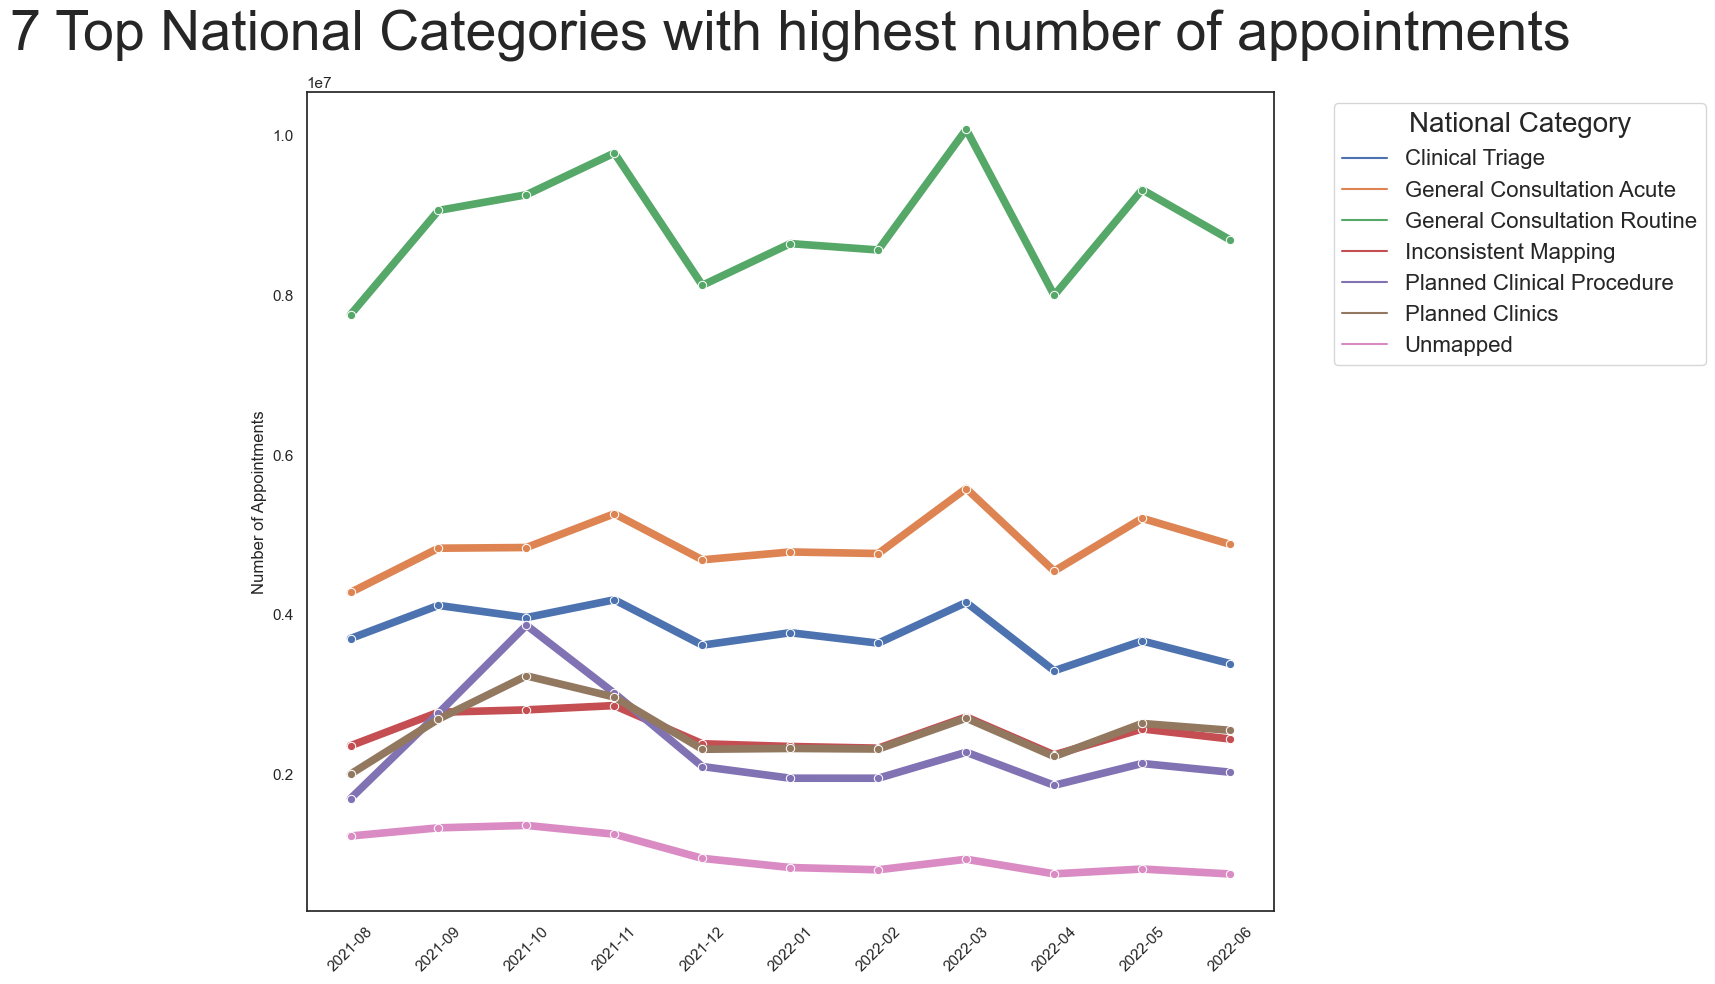

In [20]:
# Choose only top categories
top_national_categories = national_category_filtered.groupby('national_category')['sum_of_appointments'].sum().nlargest(7).index

# Filter the DataFrame to include only the top categories
national_category_filtered_top = national_category_filtered[national_category_filtered['national_category'].isin(top_national_categories)]

plt.figure(figsize=(15 ,10))
sns.lineplot(data=national_category_filtered_top, x='appointment_month', y='sum_of_appointments', hue='national_category', marker='o', linewidth=5.5)
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Number of Appointments')
plt.title('7 Top National Categories with highest number of appointments', fontsize=40, pad=30)  # Increase title font size and add padding
plt.xticks(rotation=45)
legend = plt.legend(title='National Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)  # Increase legend font size

# Increase legend title font size
legend.get_title().set_fontsize('20')

plt.tight_layout()
plt.show()

### Answer: National category with highest number of appointments is General Consultation Routline.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

### Summer

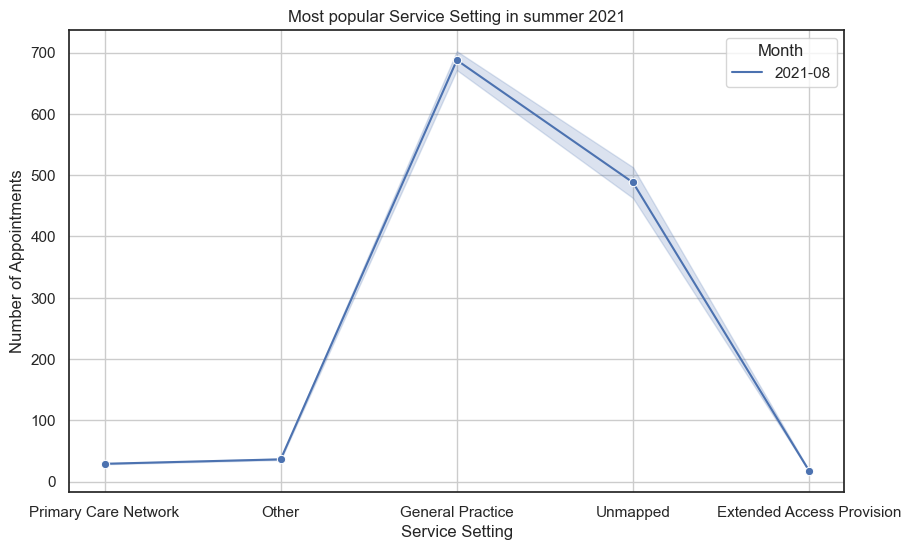

In [62]:
# Filter data for June, July, and August
summer_data = nc[nc['appointment_month'].isin(['2021-06', '2021-07', '2021-08'])]

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=summer_data, x='service_setting', y='count_of_appointments', hue='appointment_month', marker='o')
plt.title('Most popular Service Setting in summer 2021')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.legend(title='Month')
plt.grid(True)
plt.show()

### Autum

C:\Users\Kasia\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1200 with 0 Axes>

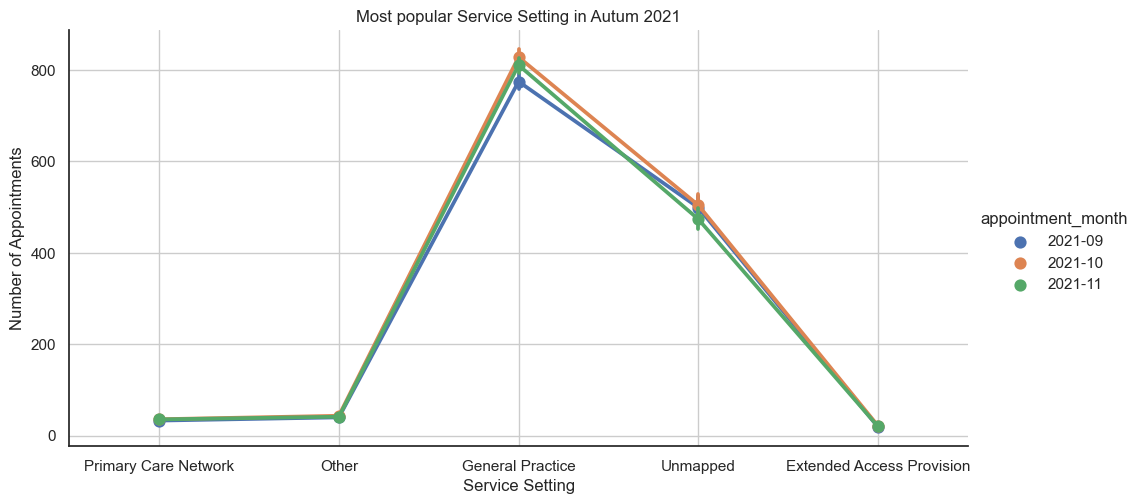

In [63]:
# Filter data for September, October, and November
autumn_data = nc[nc['appointment_month'].isin(['2021-09', '2021-10', '2021-11'])]

# Define the order of service settings
service_order = ['Primary Care Network', 'Other',  'General Practice', 'Unmapped', 'Extended Access Provision']

# Create a line plot
plt.figure(figsize=(15, 12))
sns.catplot(data=autumn_data, x='service_setting', y='count_of_appointments', hue='appointment_month',
            kind='point', order=service_order, height=5, aspect=2, legend='in')
plt.title('Most popular Service Setting in Autum 2021')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.grid(True)
plt.show()

### Winter

C:\Users\Kasia\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1200 with 0 Axes>

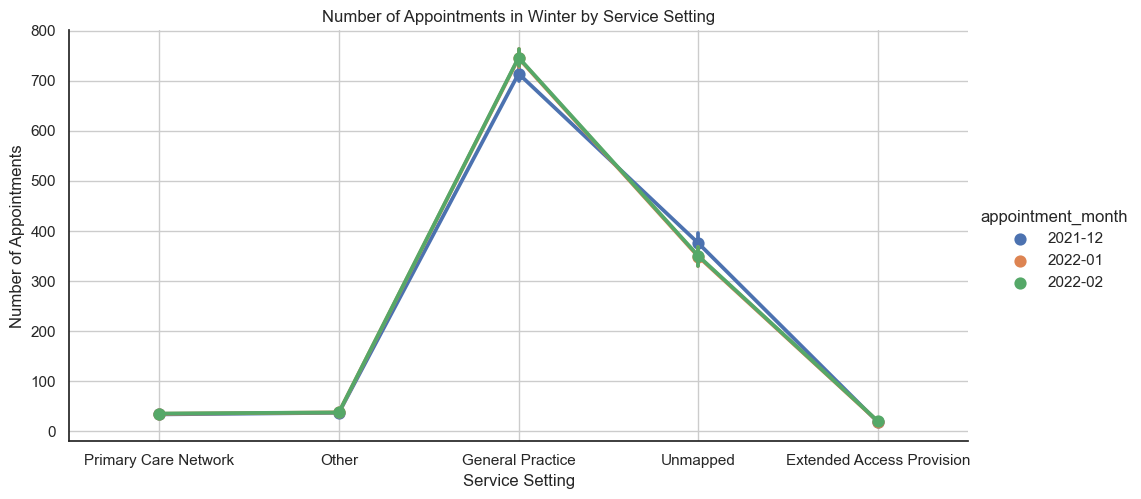

In [64]:
# Filter data for December, January and February
autumn_data = nc[nc['appointment_month'].isin(['2021-12', '2022-01', '2022-02'])]

# Define the order of service settings
service_order = ['Primary Care Network', 'Other',  'General Practice', 'Unmapped', 'Extended Access Provision']

# Create a line plot
plt.figure(figsize=(15, 12))
sns.catplot(data=autumn_data, x='service_setting', y='count_of_appointments', hue='appointment_month',
            kind='point', order=service_order, height=5, aspect=2, legend=True)
plt.title('Number of Appointments in Winter by Service Setting')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.grid(True)
plt.show()

### Spring

C:\Users\Kasia\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1200 with 0 Axes>

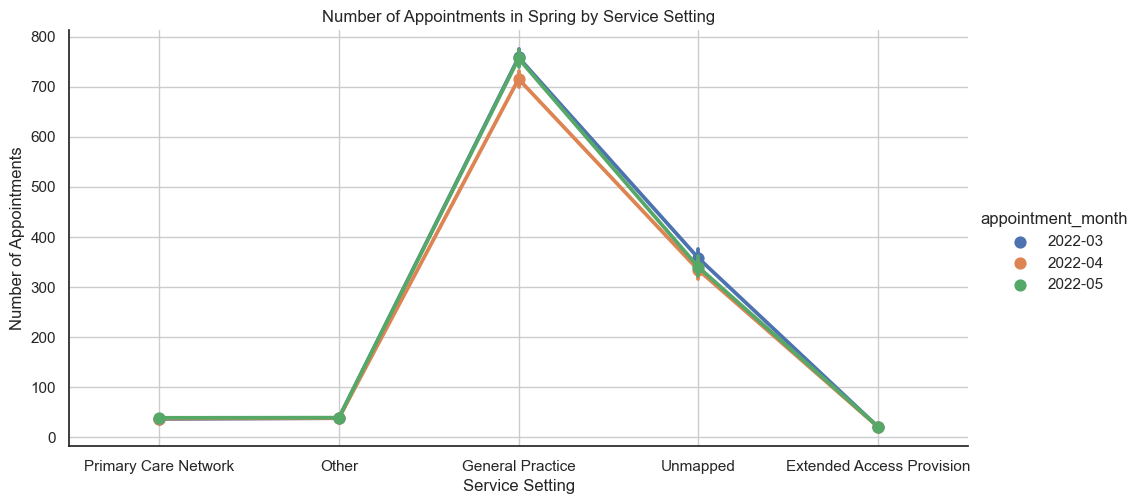

In [65]:
# Filter data for March, April and May
autumn_data = nc[nc['appointment_month'].isin(['2022-03', '2022-04', '2022-05'])]

# Define the order of service settings
service_order = ['Primary Care Network', 'Other',  'General Practice', 'Unmapped', 'Extended Access Provision']

# Create a line plot
plt.figure(figsize=(15, 12))
sns.catplot(data=autumn_data, x='service_setting', y='count_of_appointments', hue='appointment_month',
            kind='point', order=service_order, height=5, aspect=2, legend=True)
plt.title('Number of Appointments in Spring by Service Setting')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.grid(True)
plt.show()

### Answer: In each season General Practise had the highest number of appointments.

## 5) Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [66]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [67]:
# Create a new DataFrame containing only the text.
tweets_text_only = pd.DataFrame(t['tweet_full_text'], columns=['tweet_full_text'])

print(tweets_text_only)

                                                                                                                                                                                              tweet_full_text
0     As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                 RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                              RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                                RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about memb

In [68]:
# Loop through the messages, and create a list of values containing the # symbol.

# List to store values containing '#'
hashtags_list = []

# Loop through the 'tweet_full_text' column
for tweet in tweets_text_only['tweet_full_text']:
    # Check if '#' symbol is present in the tweet
    # Split the tweet in single words and look for words containing  '#' at the start or at the end.
    if '#' in tweet:
        hashtags = [tag for tag in tweet.split() if tag.startswith('#') or tag.endswith('#')]
        hashtags_list.extend(hashtags)

# Display the first 30 records
print(hashtags_list[:30])

['#Healthcare', '#PremiseHealth', '#hiring', '#Healthcare', '#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', '#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '#disparities.', '#healthcare', '#alert', '#insurance', '#data', '#Healthcare', '#healthcare', '#Healthcare']


In [69]:
# Convert the series to a DataFrame in preparation for visualisation.
hashtags_df = pd.DataFrame(hashtags_list, columns=['Hashtags'])

# Add 'tweet_retweet_count' and 'tweet_favorite_count' columns from the 't' series
hashtags_df = hashtags_df.assign(tweet_retweet_count=t['tweet_retweet_count'], tweet_favorite_count=t['tweet_favorite_count'])

# Rename the columns.
hashtags_df = hashtags_df.rename(columns={'tweet_retweet_count': 'Retweeted', 'tweet_favorite_count': 'Favourite tweets'})

hashtags_df

Hashtags  Retweeted  Favourite tweets
0            #Healthcare        0.0               0.0
1         #PremiseHealth        2.0               0.0
2                #hiring       39.0               0.0
3            #Healthcare        5.0               0.0
4                 #blogs        0.0               0.0
...                  ...        ...               ...
4322              #csjmu        NaN               NaN
4323  #MediQuestStaffing        NaN               NaN
4324           #Hospital        NaN               NaN
4325              #shift        NaN               NaN
4326                #job        NaN               NaN

[4327 rows x 3 columns]

In [70]:
# Convert the series to a DataFrame in preparation for visualisation.
tweet_count_df = t[['tweet_retweet_count', 'tweet_favorite_count']]

# Rename the columns.
tweet_count_df = tweet_count_df.rename(columns={'tweet_retweet_count': 'Retweeted', 'tweet_favorite_count': 'Favourite tweets'})

print(tweet_count_df)

      Retweeted  Favourite tweets
0             0                 0
1             2                 0
2            39                 0
3             5                 0
4             0                 0
...         ...               ...
1169          1                 0
1170          0                 1
1171          0                 0
1172          0                 5
1173          2                 0

[1174 rows x 2 columns]


In [71]:
# View datatype
print(hashtags_df.dtypes)

Hashtags             object
Retweeted           float64
Favourite tweets    float64
dtype: object


In [72]:
# Fill NaN values with 0
hashtags_df['Retweeted'] = hashtags_df['Retweeted'].fillna(0)
hashtags_df['Favourite tweets'] = hashtags_df['Favourite tweets'].fillna(0)

# Convert to integers
hashtags_df['Retweeted'] = hashtags_df['Retweeted'].astype('int64')
hashtags_df['Favourite tweets'] = hashtags_df['Favourite tweets'].astype('int64')

# View the result
print(hashtags_df.dtypes)

Hashtags            object
Retweeted            int64
Favourite tweets     int64
dtype: object


In [73]:
# Count rows with values larger than 10 in column 'Retweeted'
retweeted_count = (hashtags_df['Retweeted'] > 10).sum()

# Count rows with values larger than 10 in column 'Favourite tweets'
favourite_tweets_count = (hashtags_df['Favourite tweets'] > 10).sum()

print("Count of values larger than 10 in 'Retweeted' column:", retweeted_count)
print("Count of values larger than 10 in 'Favourite tweets' column:", favourite_tweets_count)

Count of values larger than 10 in 'Retweeted' column: 124
Count of values larger than 10 in 'Favourite tweets' column: 9


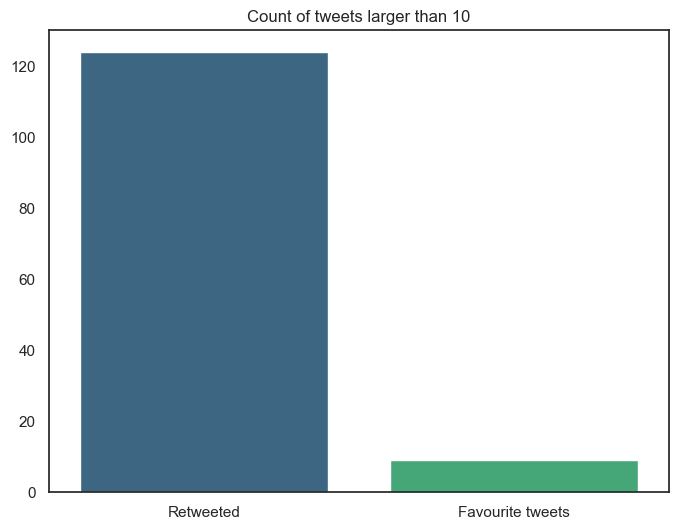

In [74]:
# Count rows with values larger than 10 in column 'Retweeted' and 'Favourite tweets'
counts = {
    'Retweeted': (hashtags_df['Retweeted'] > 10).sum(),
    'Favourite tweets': (hashtags_df['Favourite tweets'] > 10).sum()
}

# Convert counts to DataFrame
counts_df = pd.DataFrame(list(counts.items()), columns=['Column', 'Count'])

# Create a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Column', y='Count', data=counts_df, palette='viridis')
plt.title('Count of tweets larger than 10')
plt.xlabel('')
plt.ylabel('')
plt.show()

### How the NHS can utilise tweets and whether the tweets add value to the overall project?

### Answer: I think that from Twitter data it could be useful to gather infomration about tweets containing tweets appearing number of times. It helps to see weather patients using NHS are satisfied or not and which comments (positive or negative) appears most often and on which topic.

## Data exploration

### a) Checking how people attended booked appointments.

In [75]:
# Create a new data frame
ar_filtered = ar.groupby(['appointment_status'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered  

appointment_status  sum_of_records
0           Attended       677755876
1                DNA        30911233
2            Unknown        34137416

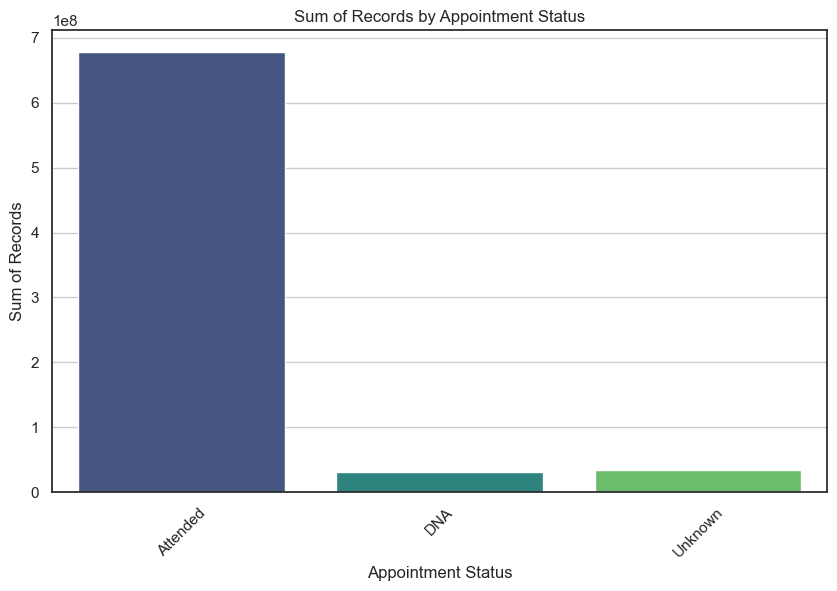

In [76]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ar_filtered, x='appointment_status', y='sum_of_records', palette='viridis')
plt.title('Sum of Records by Appointment Status')
plt.xlabel('Appointment Status')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

### Answer: Most of the patients attended their appointments.

### b) How people attended appointments over given period of time?

In [77]:
# Creating new data frame - appointment_status by count of appointments.

ar_filtered = ar.groupby(['appointment_status', 'appointment_month'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered  

appointment_status appointment_month  sum_of_records
0            Attended           2020-01        24538291
1            Attended           2020-02        21640067
2            Attended           2020-03        20718865
3            Attended           2020-04        13982824
4            Attended           2020-05        14962850
..                ...               ...             ...
85            Unknown           2022-02          926663
86            Unknown           2022-03         1135148
87            Unknown           2022-04          918791
88            Unknown           2022-05          952049
89            Unknown           2022-06          944971

[90 rows x 3 columns]

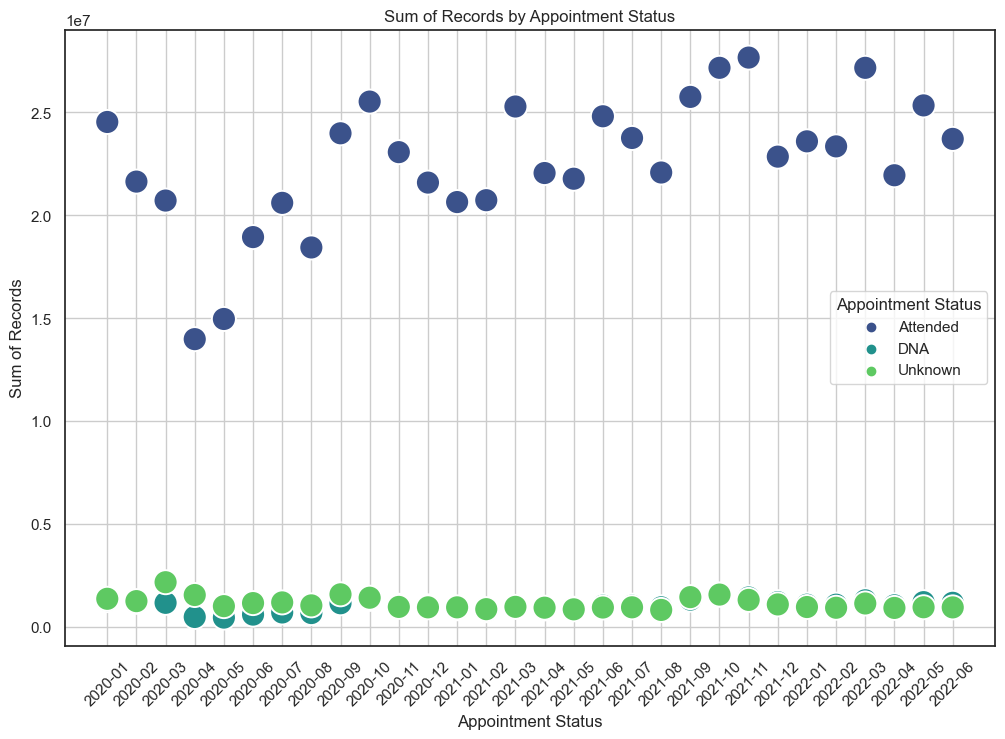

In [78]:
# Create scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ar_filtered, x='appointment_month', y='sum_of_records', hue='appointment_status', palette='viridis', s=300)
plt.title('Sum of Records by Appointment Status')
plt.xlabel('Appointment Status')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Appointment Status')
plt.grid(True)  # Add grid lines
plt.show()

### Plot for presentation

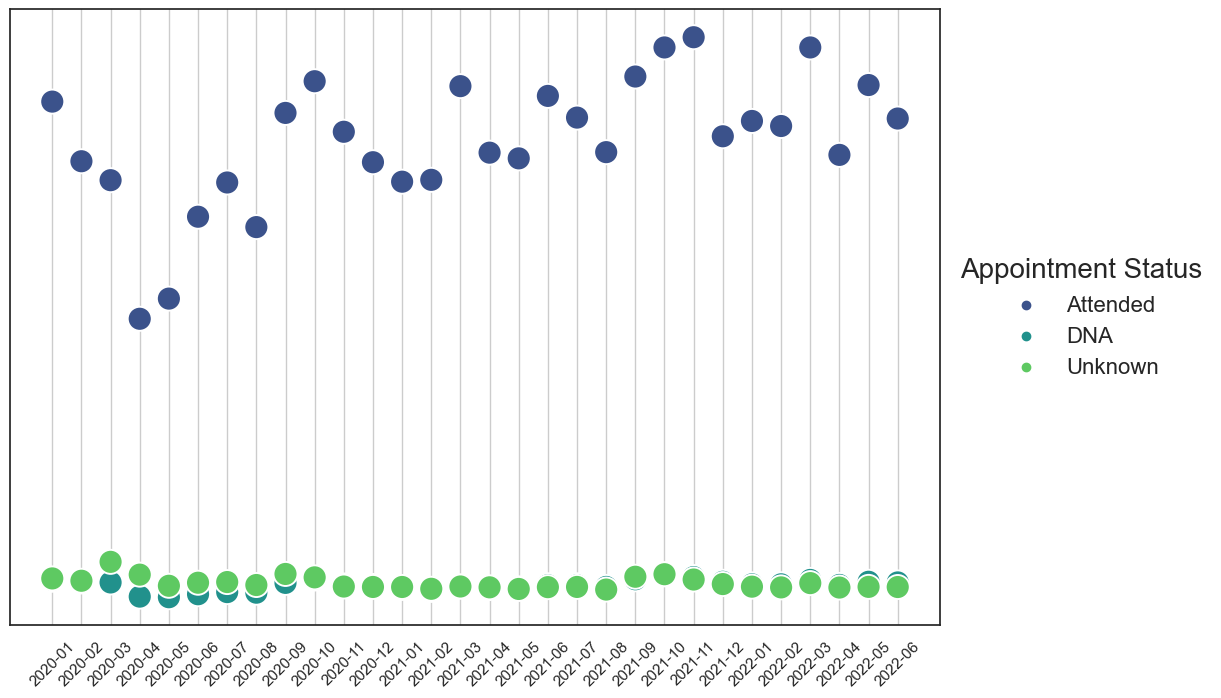

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ar_filtered, x='appointment_month', y='sum_of_records', hue='appointment_status', palette='viridis', s=300)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().set(xlabel='', ylabel='', yticks=[], title='')  # Remove x and y-axis labels and tick labels
plt.grid(True)  # Add grid lines
plt.legend(title='Appointment Status', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=16, title_fontsize=20, frameon=False)  # Move legend to the right side of the plot
plt.show()

### Answer: There is no significant changes in how patients attended appointments over time apart from beginning of 2020 when pandemic started and attendence dropped for a while.

### c) Checking number of appointments across appointments modes.

In [80]:
# Create a new data frame 
ar_filtered = ar.groupby(['appointment_mode', 'appointment_month'  ])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered 

appointment_mode appointment_month  sum_of_records
0       Face-to-Face           2020-01        21733394
1       Face-to-Face           2020-02        19230573
2       Face-to-Face           2020-03        15921794
3       Face-to-Face           2020-04         7480941
4       Face-to-Face           2020-05         7729597
..               ...               ...             ...
145     Video/Online           2022-02          127697
146     Video/Online           2022-03          152018
147     Video/Online           2022-04          126453
148     Video/Online           2022-05          144188
149     Video/Online           2022-06          136117

[150 rows x 3 columns]

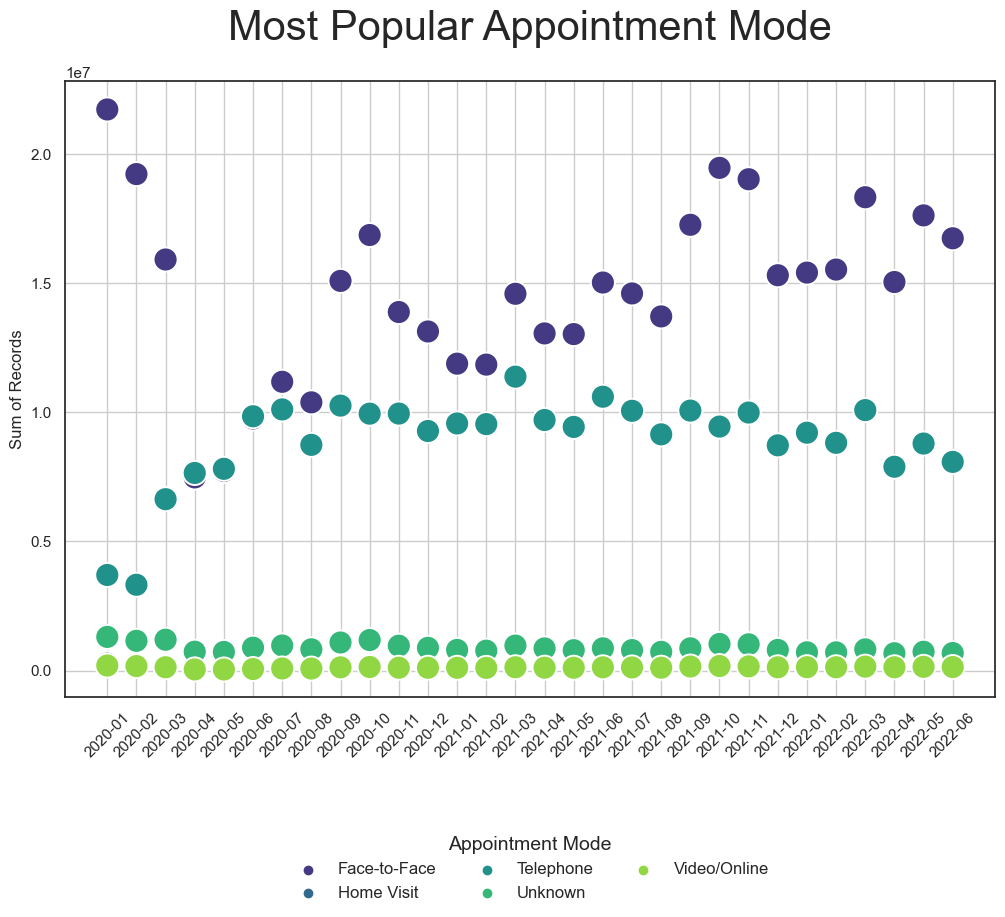

In [81]:
# Create scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ar_filtered, x='appointment_month', y='sum_of_records', hue='appointment_mode', palette='viridis', s=300)

# Add and customize title
plt.title('Most Popular Appointment Mode', fontsize=30, pad=30)

# Customize axis labels and grid
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add grid lines

# Move legend to the bottom outside the plot
plt.legend(title='Appointment Mode', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, fontsize=12, title_fontsize=14, frameon=False)

plt.show()

### Answer: Mostly booked are face-to-face appointments.

### d) HCP type by number of appointments

In [82]:
# Create a new data frame
ar_filtered = ar.groupby(['hcp_type', 'appointment_month'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered 

hcp_type appointment_month  sum_of_records
0        GP           2020-01        14168932
1        GP           2020-02        12467976
2        GP           2020-03        12839993
3        GP           2020-04         8795939
4        GP           2020-05         8924583
..      ...               ...             ...
85  Unknown           2022-02          797442
86  Unknown           2022-03          939228
87  Unknown           2022-04          786859
88  Unknown           2022-05          878374
89  Unknown           2022-06          828418

[90 rows x 3 columns]

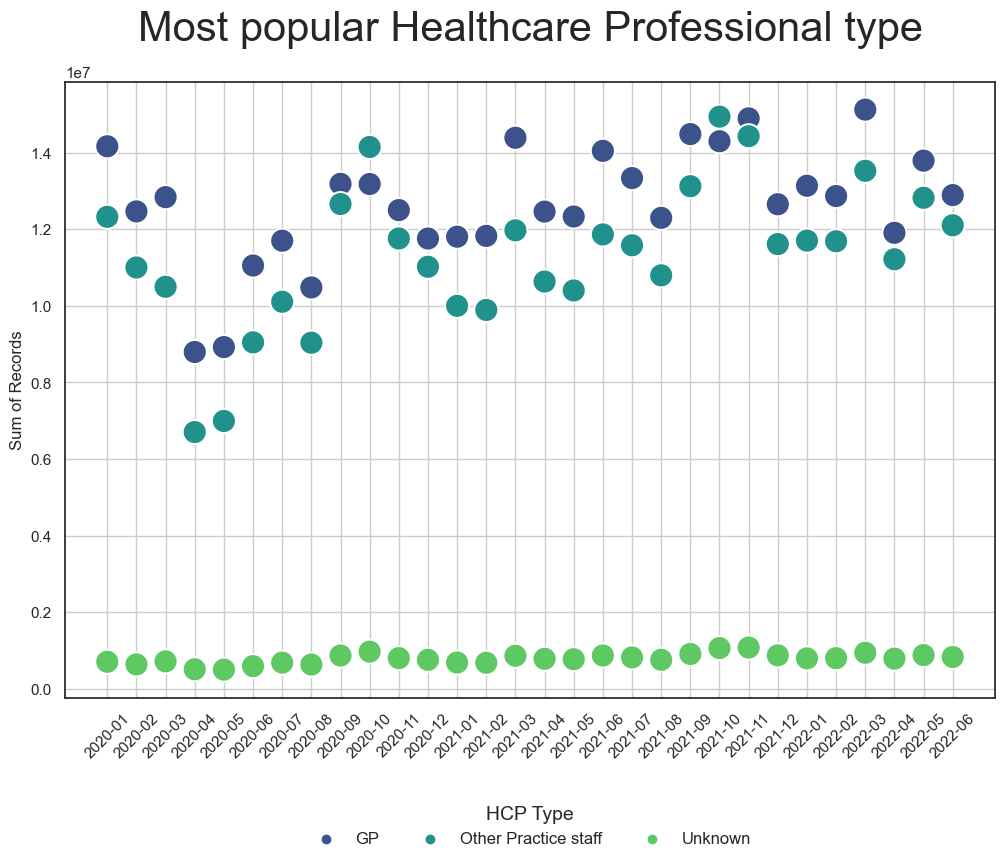

In [83]:
# Create scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ar_filtered, x='appointment_month', y='sum_of_records', hue='hcp_type', palette='viridis', s=300)

# Add and customize title
plt.title('Most popular Healthcare Professional type', fontsize=30, pad=30)

# Customize axis labels and grid
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add grid lines

# Move legend to the bottom outside the plot
plt.legend(title='HCP Type', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, fontsize=12, title_fontsize=14, frameon=False)

plt.show()

### Answer: Most popular healthcare popular type is GP.

### e) Appointments status vs appointment mode

In [84]:
ar_filtered = ar.groupby(['appointment_mode', 'appointment_status'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered 

appointment_mode appointment_status  sum_of_records
0      Face-to-Face           Attended       392705999
1      Face-to-Face                DNA        24253038
2      Face-to-Face            Unknown        23022692
3        Home Visit           Attended         3612068
4        Home Visit                DNA          187571
5        Home Visit            Unknown         1088237
6         Telephone           Attended       254799226
7         Telephone                DNA         5262251
8         Telephone            Unknown         7801180
9           Unknown           Attended        23335350
10          Unknown                DNA         1049427
11          Unknown            Unknown         2066528
12     Video/Online           Attended         3303233
13     Video/Online                DNA          158946
14     Video/Online            Unknown          158779

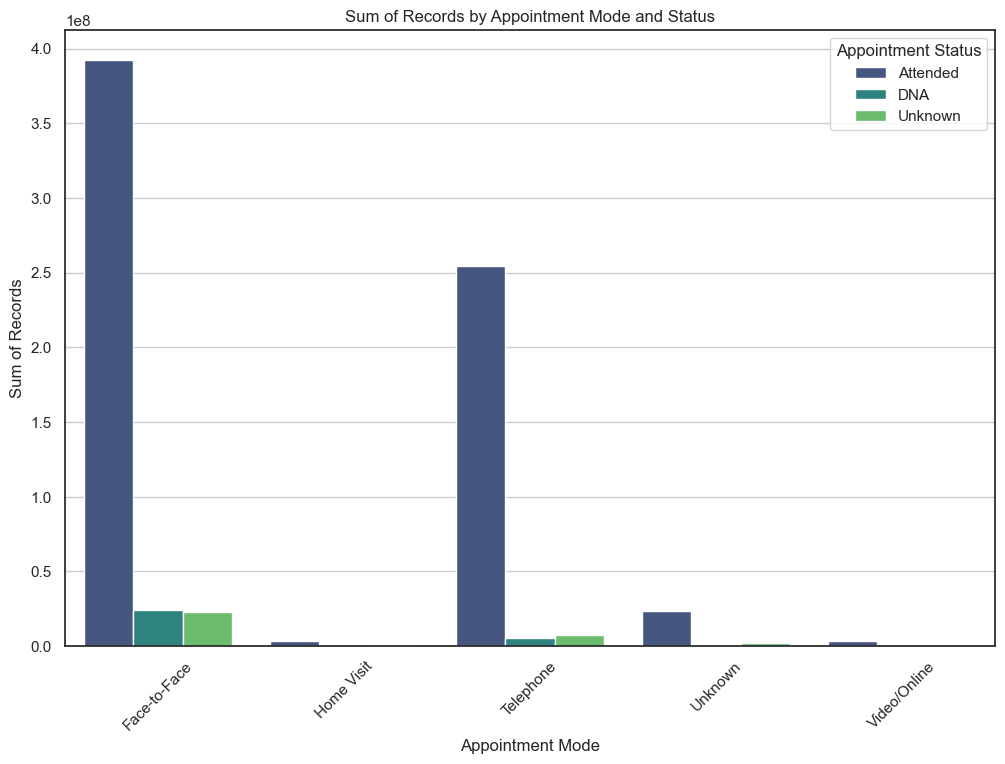

In [85]:
# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ar_filtered, x='appointment_mode', y='sum_of_records', hue='appointment_status', palette='viridis')
plt.title('Sum of Records by Appointment Mode and Status')
plt.xlabel('Appointment Mode')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Appointment Status')
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

### Plot for presentation

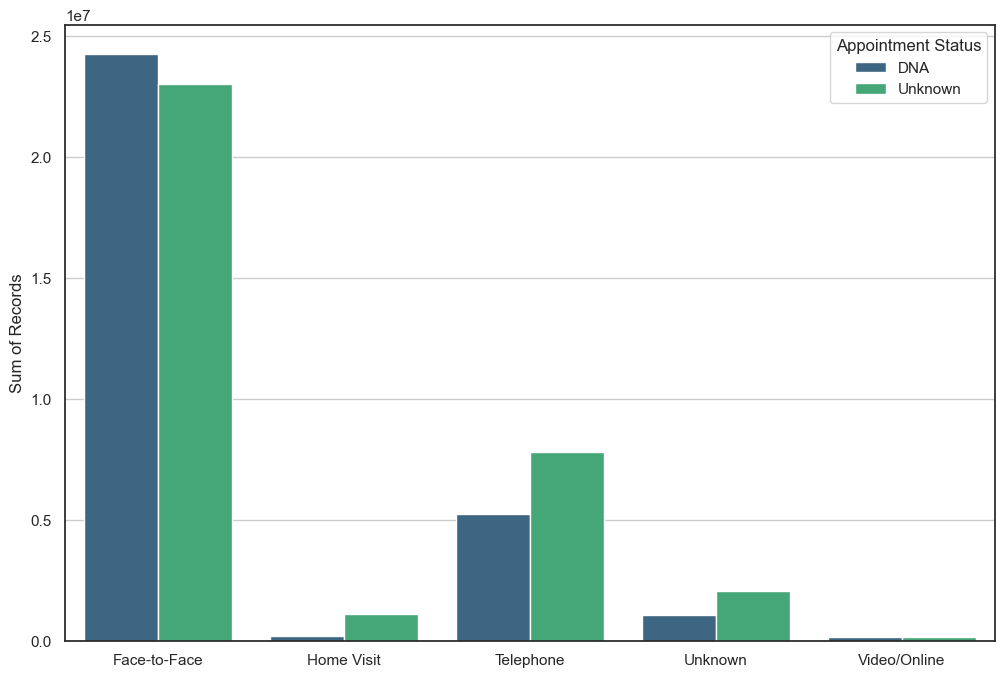

In [86]:
# Filter out the 'Attended' status
ar_filtered_no_attended = ar_filtered[ar_filtered['appointment_status'] != 'Attended']

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ar_filtered_no_attended, x='appointment_mode', y='sum_of_records', hue='appointment_status', palette='viridis')
plt.xlabel('')
plt.ylabel('Sum of Records')
plt.legend(title='Appointment Status')
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

### Answer: Mostly missed are face-to-face appointments. There is also large number of appointments about which we do not know if they were missed or attended.

### f) Appointment status vs hcp type

In [87]:
# Create a new data frame
ar_filtered = ar.groupby(['hcp_type', 'appointment_status'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered 

hcp_type appointment_status  sum_of_records
0                    GP           Attended       357847005
1                    GP                DNA         9428935
2                    GP            Unknown        12374200
3  Other Practice staff           Attended       299129577
4  Other Practice staff                DNA        20829335
5  Other Practice staff            Unknown        19691623
6               Unknown           Attended        20779294
7               Unknown                DNA          652963
8               Unknown            Unknown         2071593

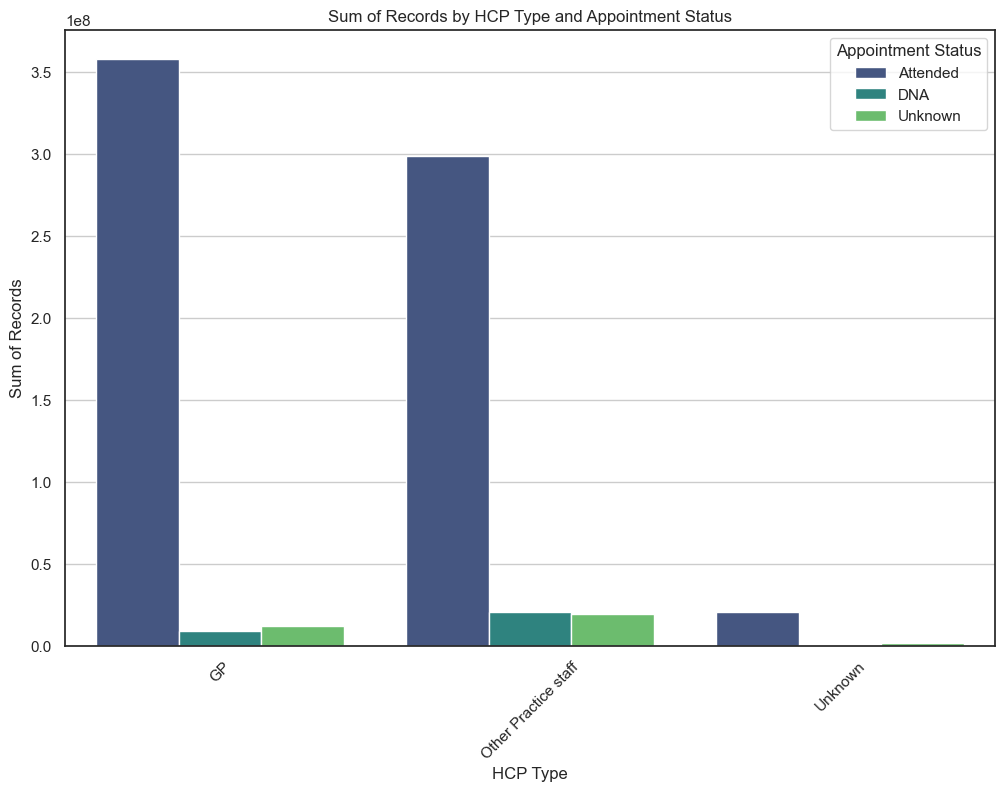

In [88]:
# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ar_filtered, x='hcp_type', y='sum_of_records', hue='appointment_status', palette='viridis')
plt.title('Sum of Records by HCP Type and Appointment Status')
plt.xlabel('HCP Type')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Appointment Status')
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

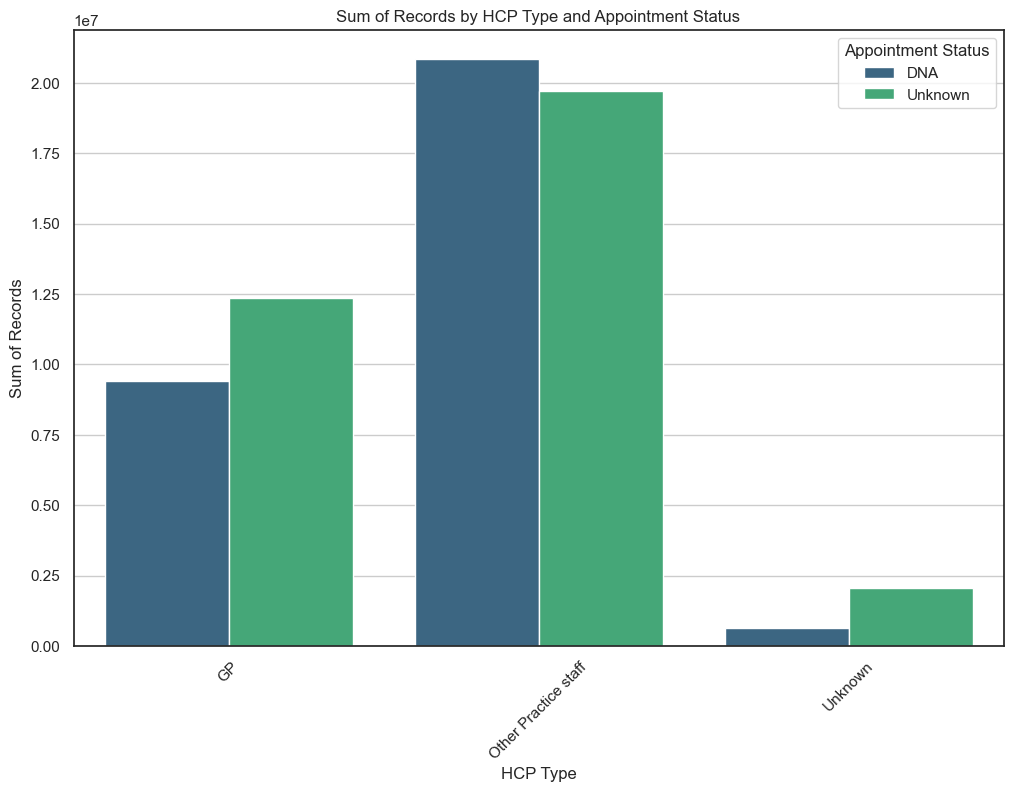

In [89]:
# Filter out the 'Attended' status
ar_filtered_no_attended = ar_filtered[ar_filtered['appointment_status'] != 'Attended']

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ar_filtered_no_attended, x='hcp_type', y='sum_of_records', hue='appointment_status', palette='viridis')
plt.title('Sum of Records by HCP Type and Appointment Status')
plt.xlabel('HCP Type')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Appointment Status')
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

### Plot for presentation

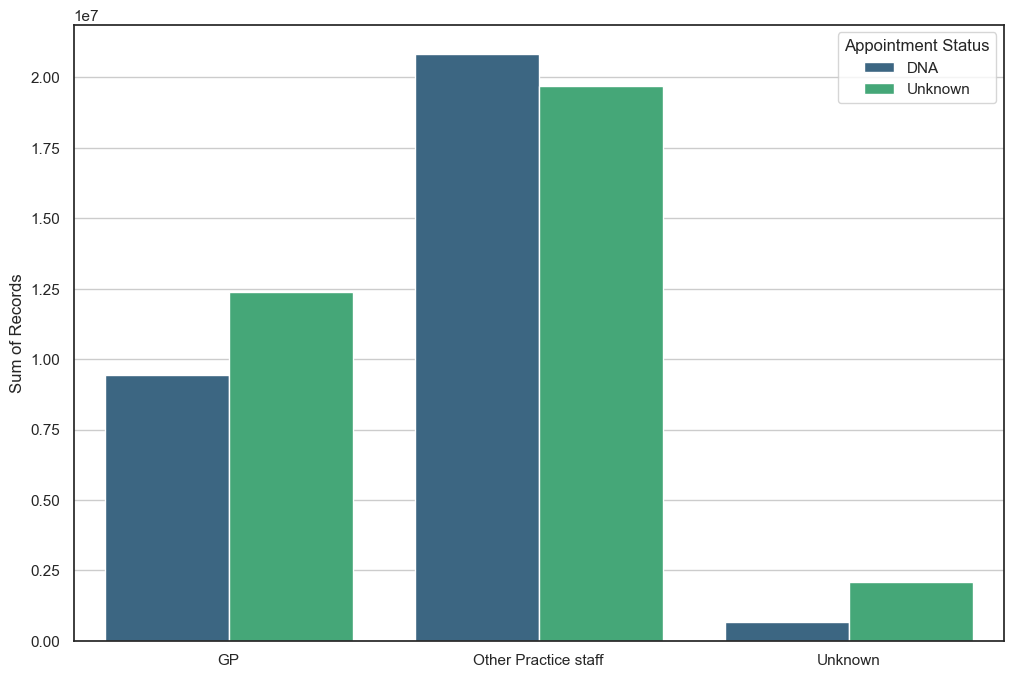

In [90]:
# Filter out the 'Attended' status
ar_filtered_no_attended = ar_filtered[ar_filtered['appointment_status'] != 'Attended']

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ar_filtered_no_attended, x='hcp_type', y='sum_of_records', hue='appointment_status', palette='viridis')
plt.xlabel('')
plt.ylabel('Sum of Records')
plt.legend(title='Appointment Status')
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

### Answer: There are mostly other practice staff appointments missed.

### g) Missed appointments over time

In [91]:
# Create a new data frame
ar_filtered3 = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered3 

appointment_month appointment_status  sum_of_records
0            2020-01           Attended        24538291
1            2020-01                DNA         1298269
2            2020-01            Unknown         1362736
3            2020-02           Attended        21640067
4            2020-02                DNA         1215154
..               ...                ...             ...
85           2022-05                DNA         1199518
86           2022-05            Unknown          952049
87           2022-06           Attended        23715317
88           2022-06                DNA         1167790
89           2022-06            Unknown          944971

[90 rows x 3 columns]

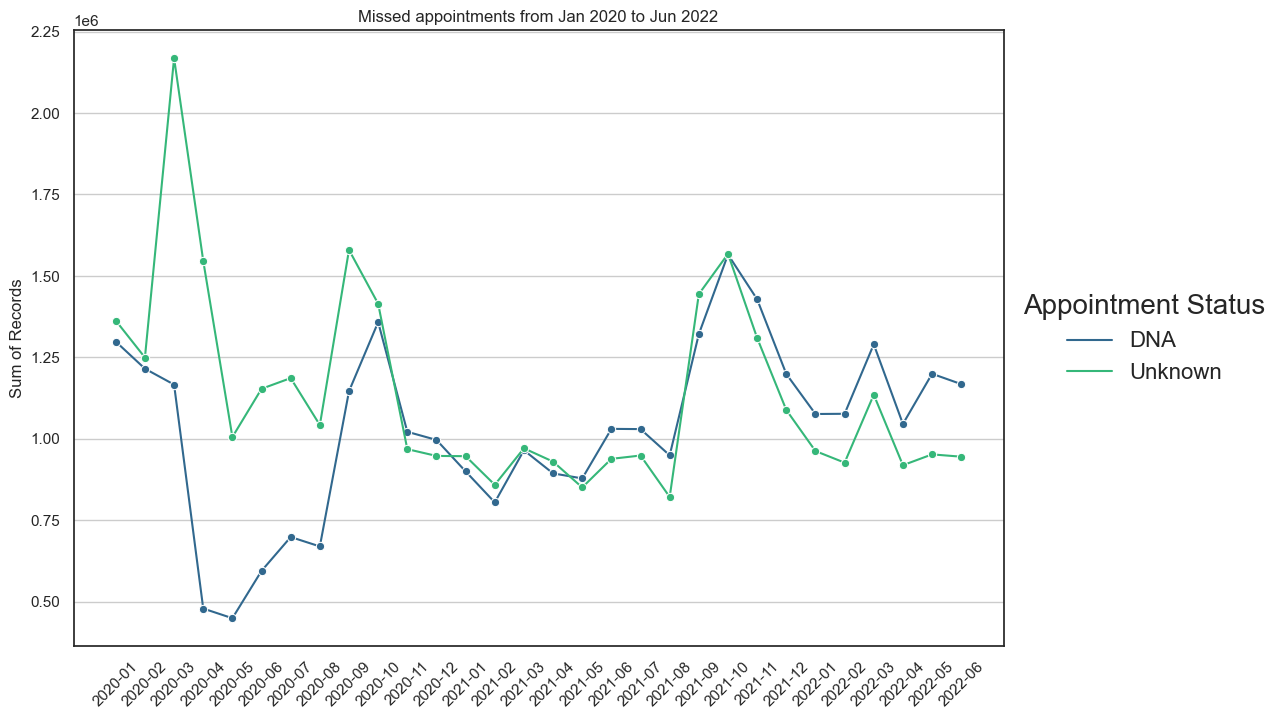

In [92]:
# Filter out the 'Attended' status
ar_filtered_no_attended = ar_filtered3[ar_filtered3['appointment_status'] != 'Attended']

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=ar_filtered_no_attended, x='appointment_month', y='sum_of_records', hue='appointment_status', palette='viridis', marker='o')
plt.title('Missed appointments from Jan 2020 to Jun 2022')
plt.xlabel('')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Appointment Status', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=16, title_fontsize=20, frameon=False)
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

### Plot for presentation

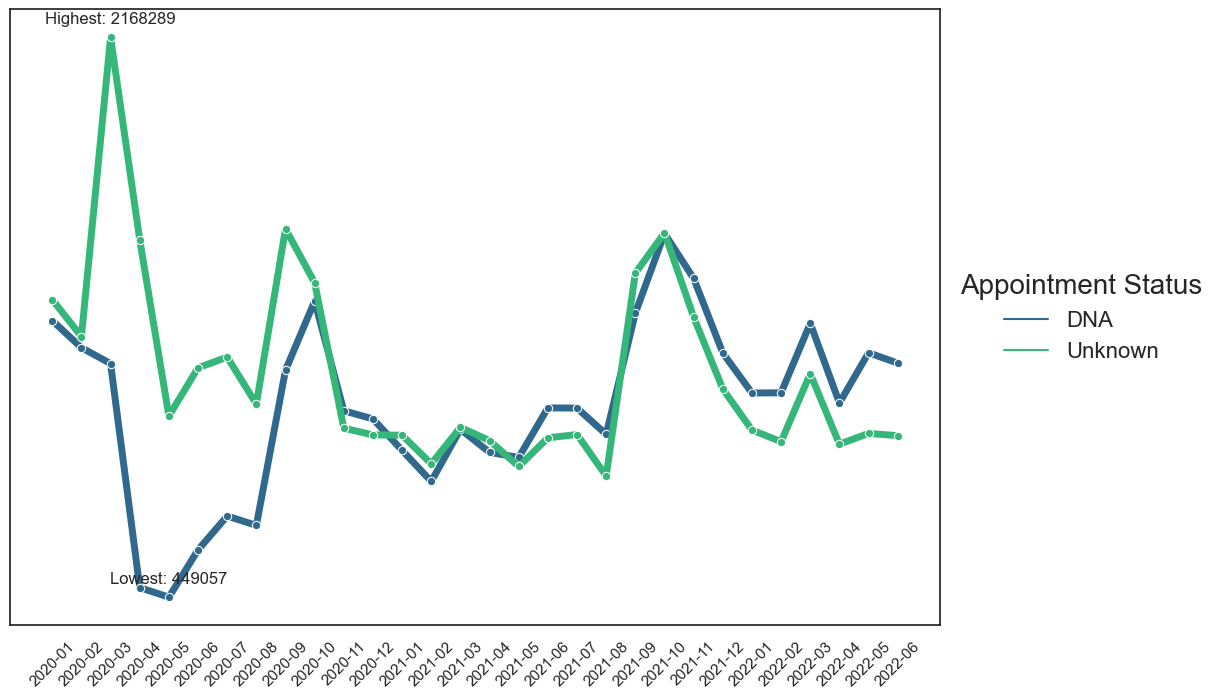

In [93]:
# Find the indices of the lowest and highest points
lowest_point_index = ar_filtered_no_attended['sum_of_records'].idxmin()
highest_point_index = ar_filtered_no_attended['sum_of_records'].idxmax()

# Get the corresponding x and y values for annotation
lowest_point_x = ar_filtered_no_attended.loc[lowest_point_index, 'appointment_month']
lowest_point_y = ar_filtered_no_attended.loc[lowest_point_index, 'sum_of_records']

highest_point_x = ar_filtered_no_attended.loc[highest_point_index, 'appointment_month']
highest_point_y = ar_filtered_no_attended.loc[highest_point_index, 'sum_of_records']

# Create the line plot with thicker line
plt.figure(figsize=(12, 8))
sns.lineplot(data=ar_filtered_no_attended, x='appointment_month', y='sum_of_records', hue='appointment_status',
             palette='viridis', marker='o', linewidth=5) 
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().set_title('')  # Remove plot title
plt.legend(title='Appointment Status', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=16,
           title_fontsize=20, frameon=False)  # Place legend on the right-hand side
plt.grid(axis='y')  # Add grid lines on y-axis
plt.gca().set(xlabel='', ylabel='', yticks=[])  # Remove x and y-axis labels and tick labels

# Add annotations for lowest and highest points
plt.annotate(f'Lowest: {lowest_point_y}', (lowest_point_x, lowest_point_y), textcoords="offset points", 
             xytext=(0,10), ha='center')
plt.annotate(f'Highest: {highest_point_y}', (highest_point_x, highest_point_y), textcoords="offset points", 
             xytext=(0,10), ha='center')

plt.show()


### Answer:  There was a drop in not attended appointments at the begining of pandemic and growth around October 2021.

# 6) Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [94]:
# Load the appointments_regional.csv file.
# Print the min and max dates.
min_date = ar['appointment_month'].min()
max_date = ar['appointment_month'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2020-01
Maximum date: 2022-06


In [95]:
# Filter the data set to only look at data from 2021-08 onwards.

# Convert 'appointment_month' to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# Filter data from 2021-08 onwards
filtered_data = ar[ar['appointment_month'] >= '2021-08-01']

filtered_data.head()

icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034        2021-08-01           Attended       GP   
3653    E54000034        2021-08-01           Attended       GP   
3654    E54000034        2021-08-01           Attended       GP   
3655    E54000034        2021-08-01           Attended       GP   
3656    E54000034        2021-08-01           Attended       GP   

     appointment_mode time_between_book_and_appointment  count_of_appointments  
3652     Face-to-Face                             1 Day                   6553  
3653     Face-to-Face                    15  to 21 Days                   2390  
3654     Face-to-Face                       2 to 7 Days                  10547  
3655     Face-to-Face                    22  to 28 Days                    937  
3656     Face-to-Face                     8  to 14 Days                   4961

In [96]:
filtered_data.tail()

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050        2022-06-01            Unknown  Unknown   
596817    E54000050        2022-06-01            Unknown  Unknown   
596818    E54000050        2022-06-01            Unknown  Unknown   
596819    E54000050        2022-06-01            Unknown  Unknown   
596820    E54000050        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10

## Question 1: Should the NHS start looking at increasing staff levels? 

In [97]:
# Create an aggregated data set from ar data frame to review the different features.

# Convert 'appointment_month' to datetime if it's not already
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

ar.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [98]:
# Determine the total number of appointments per month.

# Group by 'appointment_month' and sum 'count_of_appointments'
appointments_per_month = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Rename the column
appointments_per_month = appointments_per_month.rename(columns={'count_of_appointments': 'sum_of_appointments'})

# Print the result
appointments_per_month

appointment_month  sum_of_appointments
0         2020-01-01             27199296
1         2020-02-01             24104621
2         2020-03-01             24053468
3         2020-04-01             16007881
4         2020-05-01             16417212
5         2020-06-01             20690805
6         2020-07-01             22491437
7         2020-08-01             20150520
8         2020-09-01             26714255
9         2020-10-01             28301932
10        2020-11-01             25061602
11        2020-12-01             23535936
12        2021-01-01             22492069
13        2021-02-01             22399569
14        2021-03-01             27225424
15        2021-04-01             23879932
16        2021-05-01             23508395
17        2021-06-01             26784182
18        2021-07-01             25739219
19        2021-08-01             23852171
20        2021-09-01             28522501
21        2021-10-01             30303834
22        2021-11-01             30405070
23        2021-12-01             25140776
24        2022-01-01             25635474
25        2022-02-01             25355260
26        2022-03-01             29595038
27        2022-04-01             23913060
28        2022-05-01             27495508
29        2022-06-01             25828078

In [99]:
# Calculate average utilization
appointments_per_month['utilisation'] = appointments_per_month['sum_of_appointments'] / 30

# Round the value to one decimal place
appointments_per_month['utilisation'] = appointments_per_month['utilisation'].round(1)

# Rename the column
appointments_per_month = appointments_per_month.rename(columns={'utilisation': 'average_utilization'})

# View the DataFrame
appointments_per_month

appointment_month  sum_of_appointments  average_utilization
0         2020-01-01             27199296             906643.2
1         2020-02-01             24104621             803487.4
2         2020-03-01             24053468             801782.3
3         2020-04-01             16007881             533596.0
4         2020-05-01             16417212             547240.4
5         2020-06-01             20690805             689693.5
6         2020-07-01             22491437             749714.6
7         2020-08-01             20150520             671684.0
8         2020-09-01             26714255             890475.2
9         2020-10-01             28301932             943397.7
10        2020-11-01             25061602             835386.7
11        2020-12-01             23535936             784531.2
12        2021-01-01             22492069             749735.6
13        2021-02-01             22399569             746652.3
14        2021-03-01             27225424             907514.1
15        2021-04-01             23879932             795997.7
16        2021-05-01             23508395             783613.2
17        2021-06-01             26784182             892806.1
18        2021-07-01             25739219             857974.0
19        2021-08-01             23852171             795072.4
20        2021-09-01             28522501             950750.0
21        2021-10-01             30303834            1010127.8
22        2021-11-01             30405070            1013502.3
23        2021-12-01             25140776             838025.9
24        2022-01-01             25635474             854515.8
25        2022-02-01             25355260             845175.3
26        2022-03-01             29595038             986501.3
27        2022-04-01             23913060             797102.0
28        2022-05-01             27495508             916516.9
29        2022-06-01             25828078             860935.9

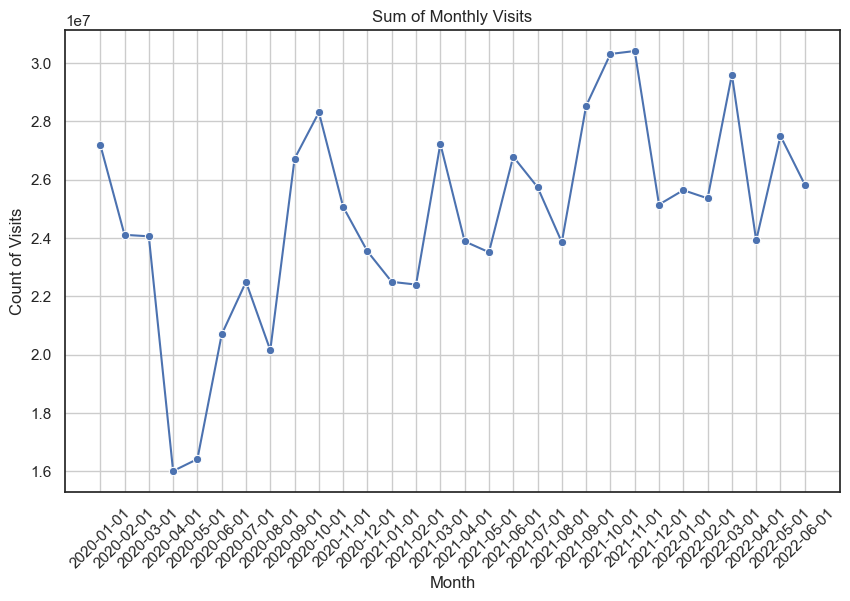

In [100]:
# Plot sum of count of monthly visits.

# Convert 'appointment_month' to string data type
appointments_per_month['appointment_month'] = appointments_per_month['appointment_month'].astype(str)

# Create a line plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=appointments_per_month, x='appointment_month', y='sum_of_appointments', marker='o')
plt.title('Sum of Monthly Visits')
plt.xlabel('Month')
plt.ylabel('Count of Visits')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add grid lines
plt.show()

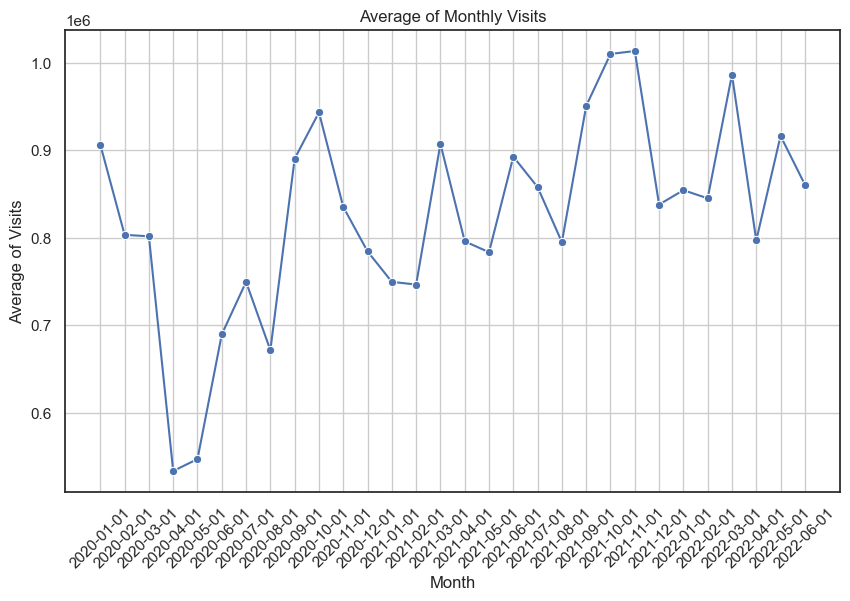

In [101]:
# Plot monthly capacity utilisation.

# Create a line plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=appointments_per_month, x='appointment_month', y='average_utilization', marker='o')
plt.title('Average of Monthly Visits')
plt.xlabel('Month')
plt.ylabel('Average of Visits')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add grid lines
plt.show()

### Answer: Number of booked appointments is not growing so there is no indication for employing new staff.

## Question 2: How do the healthcare professional types differ over time?

In [102]:
# Creating new data frame with grouped columns
ar_filtered = ar.groupby(['hcp_type', 'appointment_month'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered 

hcp_type appointment_month  sum_of_records
0        GP        2020-01-01        14168932
1        GP        2020-02-01        12467976
2        GP        2020-03-01        12839993
3        GP        2020-04-01         8795939
4        GP        2020-05-01         8924583
..      ...               ...             ...
85  Unknown        2022-02-01          797442
86  Unknown        2022-03-01          939228
87  Unknown        2022-04-01          786859
88  Unknown        2022-05-01          878374
89  Unknown        2022-06-01          828418

[90 rows x 3 columns]

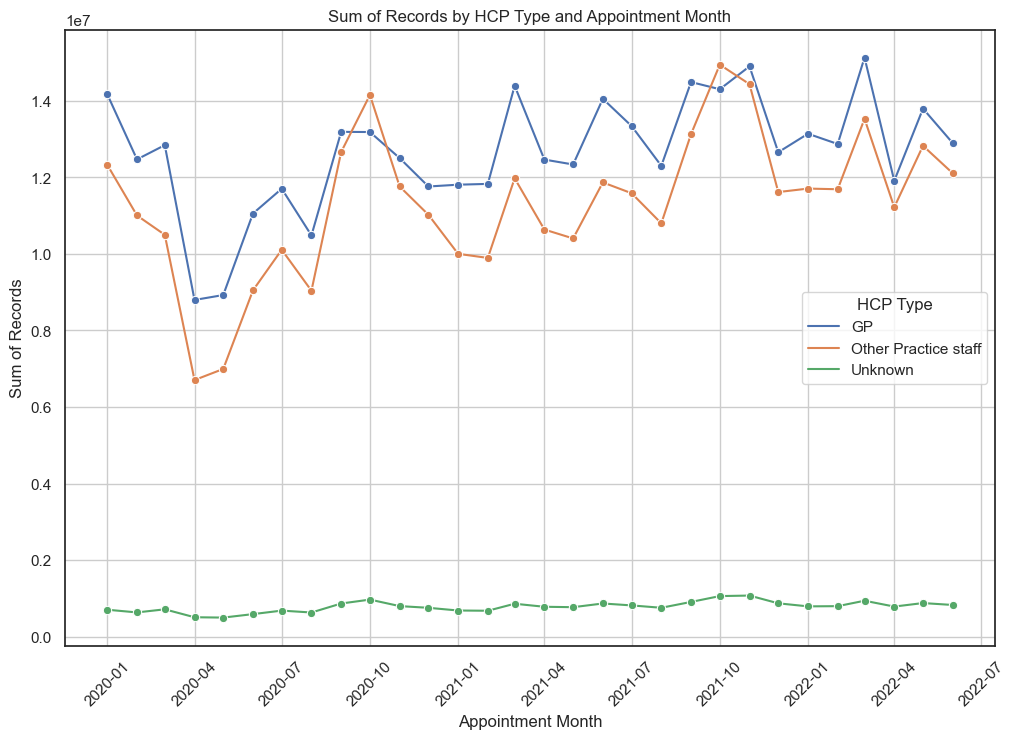

In [103]:
# Create line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=ar_filtered, x='appointment_month', y='sum_of_records', hue='hcp_type', marker='o')
plt.title('Sum of Records by HCP Type and Appointment Month')
plt.xlabel('Appointment Month')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='HCP Type')
plt.grid(True)  # Add grid lines
plt.show()


### Answer: Variety Healthcare professionals types does not show increase in number of appointments.

## Question 3: Are there significant changes in whether or not visits are attended?

In [125]:
# Create a new data frame and group columns
ar_filtered = ar.groupby(['appointment_status', 'appointment_month'])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered  

appointment_status appointment_month  sum_of_records
0            Attended        2020-01-01        24538291
1            Attended        2020-02-01        21640067
2            Attended        2020-03-01        20718865
3            Attended        2020-04-01        13982824
4            Attended        2020-05-01        14962850
..                ...               ...             ...
85            Unknown        2022-02-01          926663
86            Unknown        2022-03-01         1135148
87            Unknown        2022-04-01          918791
88            Unknown        2022-05-01          952049
89            Unknown        2022-06-01          944971

[90 rows x 3 columns]

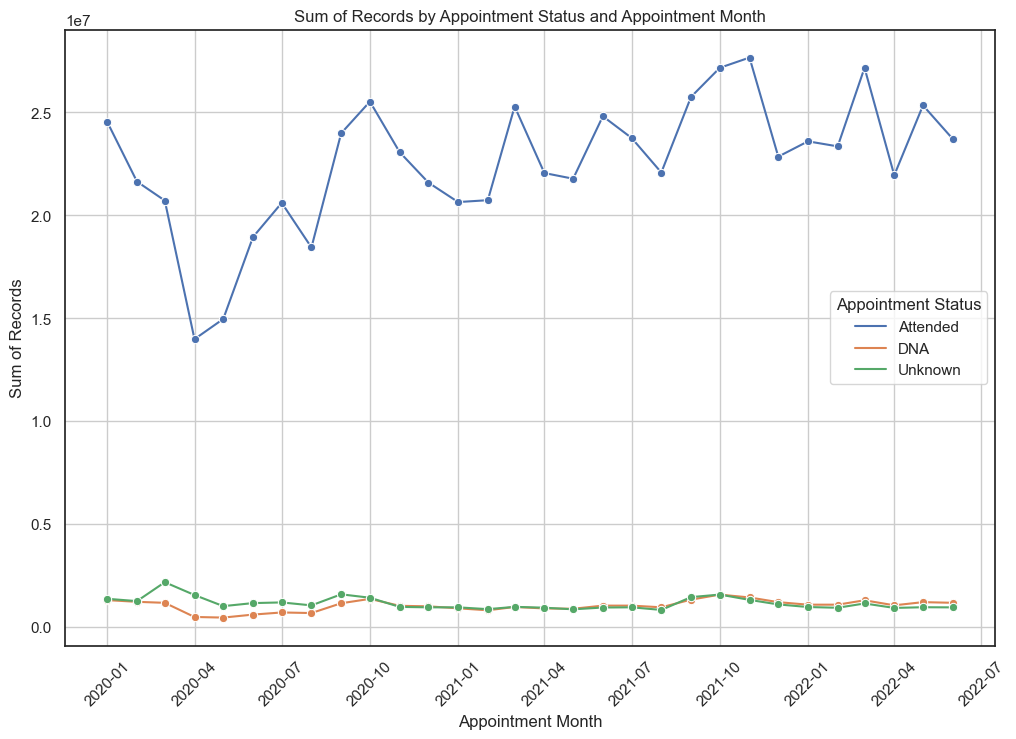

In [105]:
# Create line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=ar_filtered, x='appointment_month', y='sum_of_records', hue='appointment_status', marker='o')
plt.title('Sum of Records by Appointment Status and Appointment Month')
plt.xlabel('Appointment Month')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Appointment Status')
plt.grid(True)  # Add grid lines
plt.show()

### Answer: There is no significant changes whether or not appointments are attended. The only significant drop in attending the appointments we could see around April 2020 when the pandemic started.

## Question 4: Are there changes in terms of appointment type and the busiest months?

In [124]:
# Create a new data frameand group columns
ar_filtered = ar.groupby(['appointment_mode', 'appointment_month'  ])['count_of_appointments'].sum().reset_index(name='sum_of_records')
ar_filtered 

appointment_mode appointment_month  sum_of_records
0       Face-to-Face        2020-01-01        21733394
1       Face-to-Face        2020-02-01        19230573
2       Face-to-Face        2020-03-01        15921794
3       Face-to-Face        2020-04-01         7480941
4       Face-to-Face        2020-05-01         7729597
..               ...               ...             ...
145     Video/Online        2022-02-01          127697
146     Video/Online        2022-03-01          152018
147     Video/Online        2022-04-01          126453
148     Video/Online        2022-05-01          144188
149     Video/Online        2022-06-01          136117

[150 rows x 3 columns]

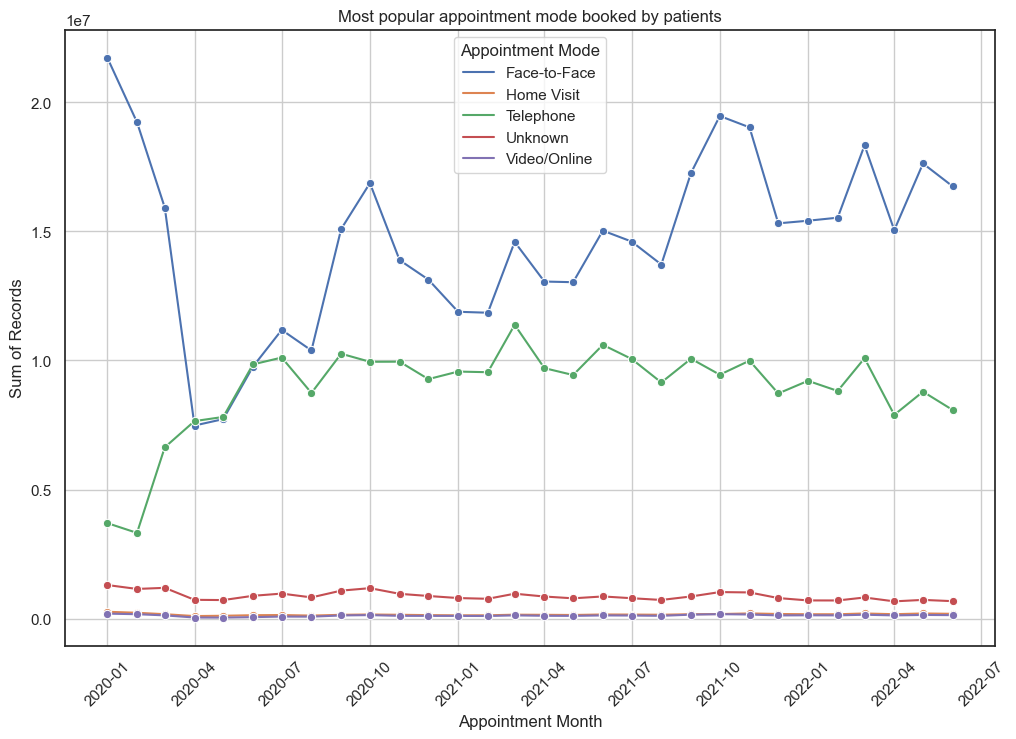

In [107]:
# Create line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=ar_filtered, x='appointment_month', y='sum_of_records', hue='appointment_mode', marker='o')
plt.title('Most popular appointment mode booked by patients')
plt.xlabel('Appointment Month')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Appointment Mode')
plt.grid(True)  # Add grid lines
plt.show()

### Answer: In the busies months number of face-to-face appointments seems to grow.

## Question 5: Are there any trends in time between booking an appointment?

In [108]:
# Create group data and sum.
grouped_ar1 = ar.groupby(['time_between_book_and_appointment', 'appointment_month'])['count_of_appointments'].sum().reset_index()

grouped_ar1

time_between_book_and_appointment appointment_month  count_of_appointments
0                               1 Day        2020-01-01                1945711
1                               1 Day        2020-02-01                1666076
2                               1 Day        2020-03-01                1822926
3                               1 Day        2020-04-01                1523077
4                               1 Day        2020-05-01                1821810
..                                ...               ...                    ...
235            Unknown / Data Quality        2022-02-01                  18459
236            Unknown / Data Quality        2022-03-01                  20832
237            Unknown / Data Quality        2022-04-01                  15114
238            Unknown / Data Quality        2022-05-01                  19763
239            Unknown / Data Quality        2022-06-01                  21536

[240 rows x 3 columns]

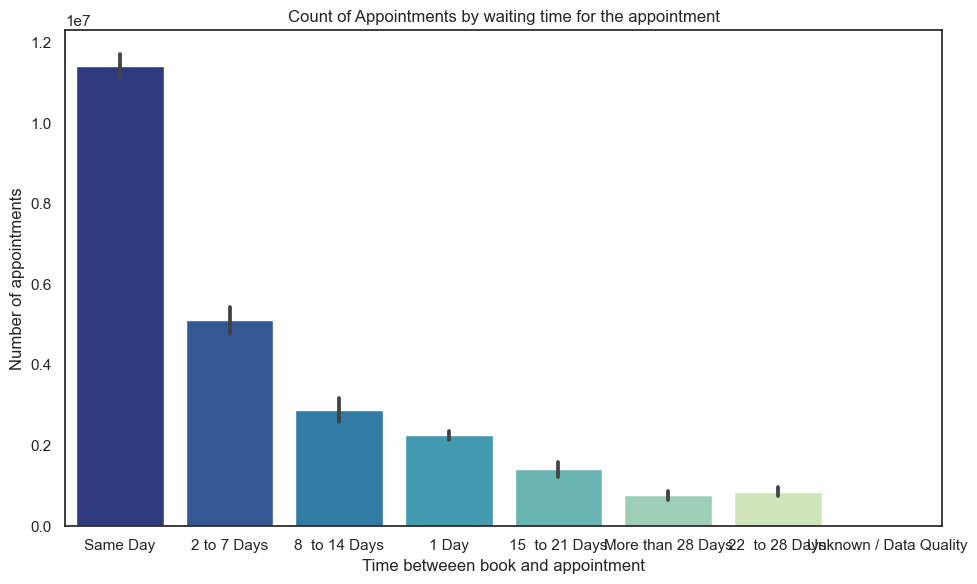

In [109]:
# Sort the DataFrame by count_of_appointments in descending order
grouped_ar1_sorted = grouped_ar1.sort_values(by='count_of_appointments', ascending=False)

# Set color palette
custom_palette = sns.color_palette("YlGnBu", len(grouped_ar1_sorted['time_between_book_and_appointment'].unique()))

# Reverse the custom color palette
custom_palette_reversed = custom_palette[::-1]

# Create bar plot with the reversed custom color palette and sorted DataFrame
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_ar1_sorted, x='time_between_book_and_appointment', y='count_of_appointments', palette=custom_palette_reversed)
plt.title('Count of Appointments by waiting time for the appointment')
plt.xlabel('Time betweeen book and appointment')
plt.ylabel('Number of appointments')

plt.tight_layout()
plt.show()

### Answer: The number of appointments is going down with the waiting time for the appointments. However, we can see significant drop in waiting time from same day appointment to '1 day' waiting time. 

## Question 6: How does the spread of service settings compare?

In [110]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# Group by 'service_settings' and 'appointment_month' and calculate the sum of appointments
appointments_per_month = nc.groupby(['service_setting', 'appointment_month'])['count_of_appointments'].sum().reset_index()

# Display the DataFrame
appointments_per_month


service_setting appointment_month  count_of_appointments
0   Extended Access Provision           2021-08                 160927
1   Extended Access Provision           2021-09                 187906
2   Extended Access Provision           2021-10                 209539
3   Extended Access Provision           2021-11                 207577
4   Extended Access Provision           2021-12                 173504
5   Extended Access Provision           2022-01                 186375
6   Extended Access Provision           2022-02                 196627
7   Extended Access Provision           2022-03                 231905
8   Extended Access Provision           2022-04                 192284
9   Extended Access Provision           2022-05                 220511
10  Extended Access Provision           2022-06                 209652
11           General Practice           2021-08               21575852
12           General Practice           2021-09               25940821
13           General Practice           2021-10               27606171
14           General Practice           2021-11               27767889
15           General Practice           2021-12               23008818
16           General Practice           2022-01               23583053
17           General Practice           2022-02               23305934
18           General Practice           2022-03               27187368
19           General Practice           2022-04               21916791
20           General Practice           2022-05               25238620
21           General Practice           2022-06               23680374
22                      Other           2021-08                 449101
23                      Other           2021-09                 527174
24                      Other           2021-10                 556487
25                      Other           2021-11                 558784
26                      Other           2021-12                 464718
27                      Other           2022-01                 457440
28                      Other           2022-02                 456153
29                      Other           2022-03                 530677
30                      Other           2022-04                 437402
31                      Other           2022-05                 503327
32                      Other           2022-06                 478813
33       Primary Care Network           2021-08                 432448
34       Primary Care Network           2021-09                 530485
35       Primary Care Network           2021-10                 564981
36       Primary Care Network           2021-11                 614324
37       Primary Care Network           2021-12                 539479
38       Primary Care Network           2022-01                 569044
39       Primary Care Network           2022-02                 585300
40       Primary Care Network           2022-03                 702176
41       Primary Care Network           2022-04                 606270
42       Primary Care Network           2022-05                 712280
43       Primary Care Network           2022-06                 700599
44                   Unmapped           2021-08                1233843
45                   Unmapped           2021-09                1336115
46                   Unmapped           2021-10                1366656
47                   Unmapped           2021-11                1256496
48                   Unmapped           2021-12                 954257
49                   Unmapped           2022-01                 839562
50                   Unmapped           2022-02                 811246
51                   Unmapped           2022-03                 942912
52                   Unmapped           2022-04                 760313
53                   Unmapped           2022-05                 820770
54                   Unmapped           2022-06                 758640

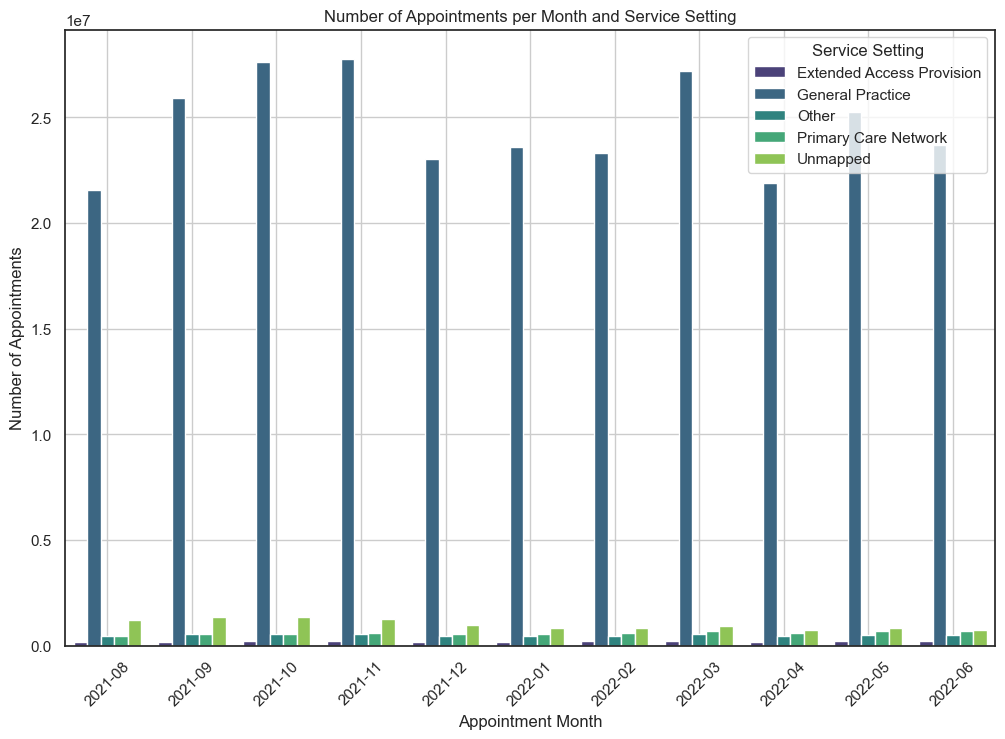

In [111]:
# Create a boxplot to investigate the spread of service settings.
plt.figure(figsize=(12, 8))
sns.barplot(data=appointments_per_month, x='appointment_month', y='count_of_appointments', hue='service_setting', palette='viridis')
plt.title('Number of Appointments per Month and Service Setting')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Service Setting')
plt.grid(True)  # Add grid lines
plt.show()

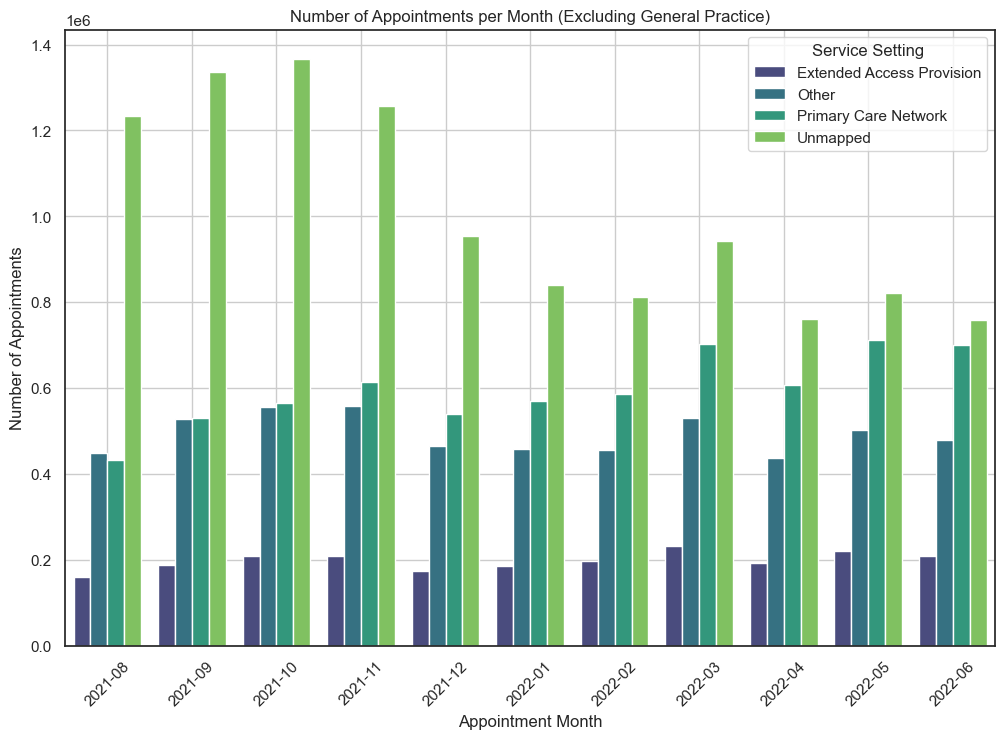

In [112]:
# Create a boxplot to investigate the service settings without GP.

# Filter out rows where service_settings is not 'General Practice'
filtered_data = appointments_per_month[appointments_per_month['service_setting'] != 'General Practice']

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='appointment_month', y='count_of_appointments', hue='service_setting', palette='viridis')
plt.title('Number of Appointments per Month (Excluding General Practice)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Service Setting')
plt.grid(True)  # Add grid lines
plt.show()

### Answer: GP appointments are most often booked by patients. Unfortunatley, second group of appointments most popular for the patients is unmapped, which means that data was gathered incorretly. 

# Exploration

### a) Actual_duration of appointments

In [113]:
# Convert 'appointment_date' column to datetime type with specified format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

# Group by month and 'actual_duration', summing the 'count_of_appointments'
grouped_ad = ad.groupby([ad['appointment_date'].dt.to_period('M'), 'actual_duration'])['count_of_appointments'].sum().reset_index()

grouped_ad.head()

appointment_date actual_duration  count_of_appointments
0          2021-12     1-5 Minutes                4266686
1          2021-12   11-15 Minutes                3280132
2          2021-12   16-20 Minutes                2023774
3          2021-12   21-30 Minutes                1885864
4          2021-12   31-60 Minutes                1163515

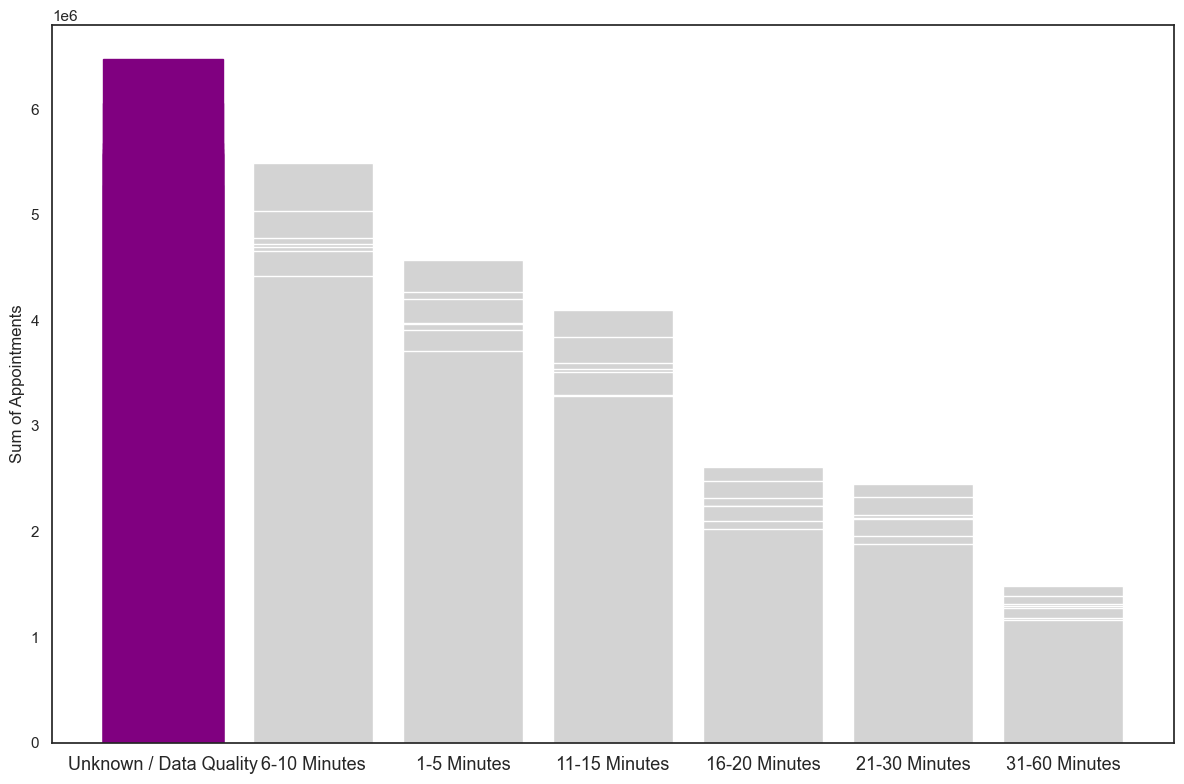

In [114]:
# Sort the DataFrame by 'count_of_appointments' in descending order
grouped_ad_sorted = grouped_ad.sort_values(by='count_of_appointments', ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(grouped_ad_sorted['actual_duration'], grouped_ad_sorted['count_of_appointments'], color='lightgrey')

# Highlight 'Unknown / Data Quality' bar
for i, duration in enumerate(grouped_ad_sorted['actual_duration']):
    if duration == 'Unknown / Data Quality':
        bars[i].set_color('purple')

plt.ylabel('Sum of Appointments')
plt.xticks(fontsize=13)  # Increase font size for x-axis tick labels
plt.tight_layout()
plt.show()

### b) How duration of appointment vary across the country?

In [115]:
# Creat new data frame and group columns
grouped_ad1 = ad.groupby(['actual_duration', 'sub_icb_location_name'])['count_of_appointments'].sum().reset_index()

grouped_ad1

actual_duration  \
0               1-5 Minutes   
1               1-5 Minutes   
2               1-5 Minutes   
3               1-5 Minutes   
4               1-5 Minutes   
..                      ...   
737  Unknown / Data Quality   
738  Unknown / Data Quality   
739  Unknown / Data Quality   
740  Unknown / Data Quality   
741  Unknown / Data Quality   

                                                sub_icb_location_name  \
0    NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G   
1                NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y   
2                               NHS Birmingham and Solihull ICB - 15E   
3                                       NHS Black Country ICB - D2P2L   
4      NHS Bristol North Somerset and South Gloucestershire ICB - 15C   
..                                                                ...   
737                                      NHS West Yorkshire ICB - 02T   
738                                      NHS West Yorkshire ICB - 03R   
739                                      NHS West Yorkshire ICB - 15F   
740                                      NHS West Yorkshire ICB - 36J   
741                                    NHS West Yorkshire ICB - X2C4Y   

     count_of_appointments  
0                   518637  
1                   508044  
2                   624605  
3                   593259  
4                   357924  
..                     ...  
737                 131059  
738                 236789  
739                 537130  
740                 619426  
741                 348539  

[742 rows x 3 columns]

C:\Users\Kasia\AppData\Local\Temp\ipykernel_10156\2394485504.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


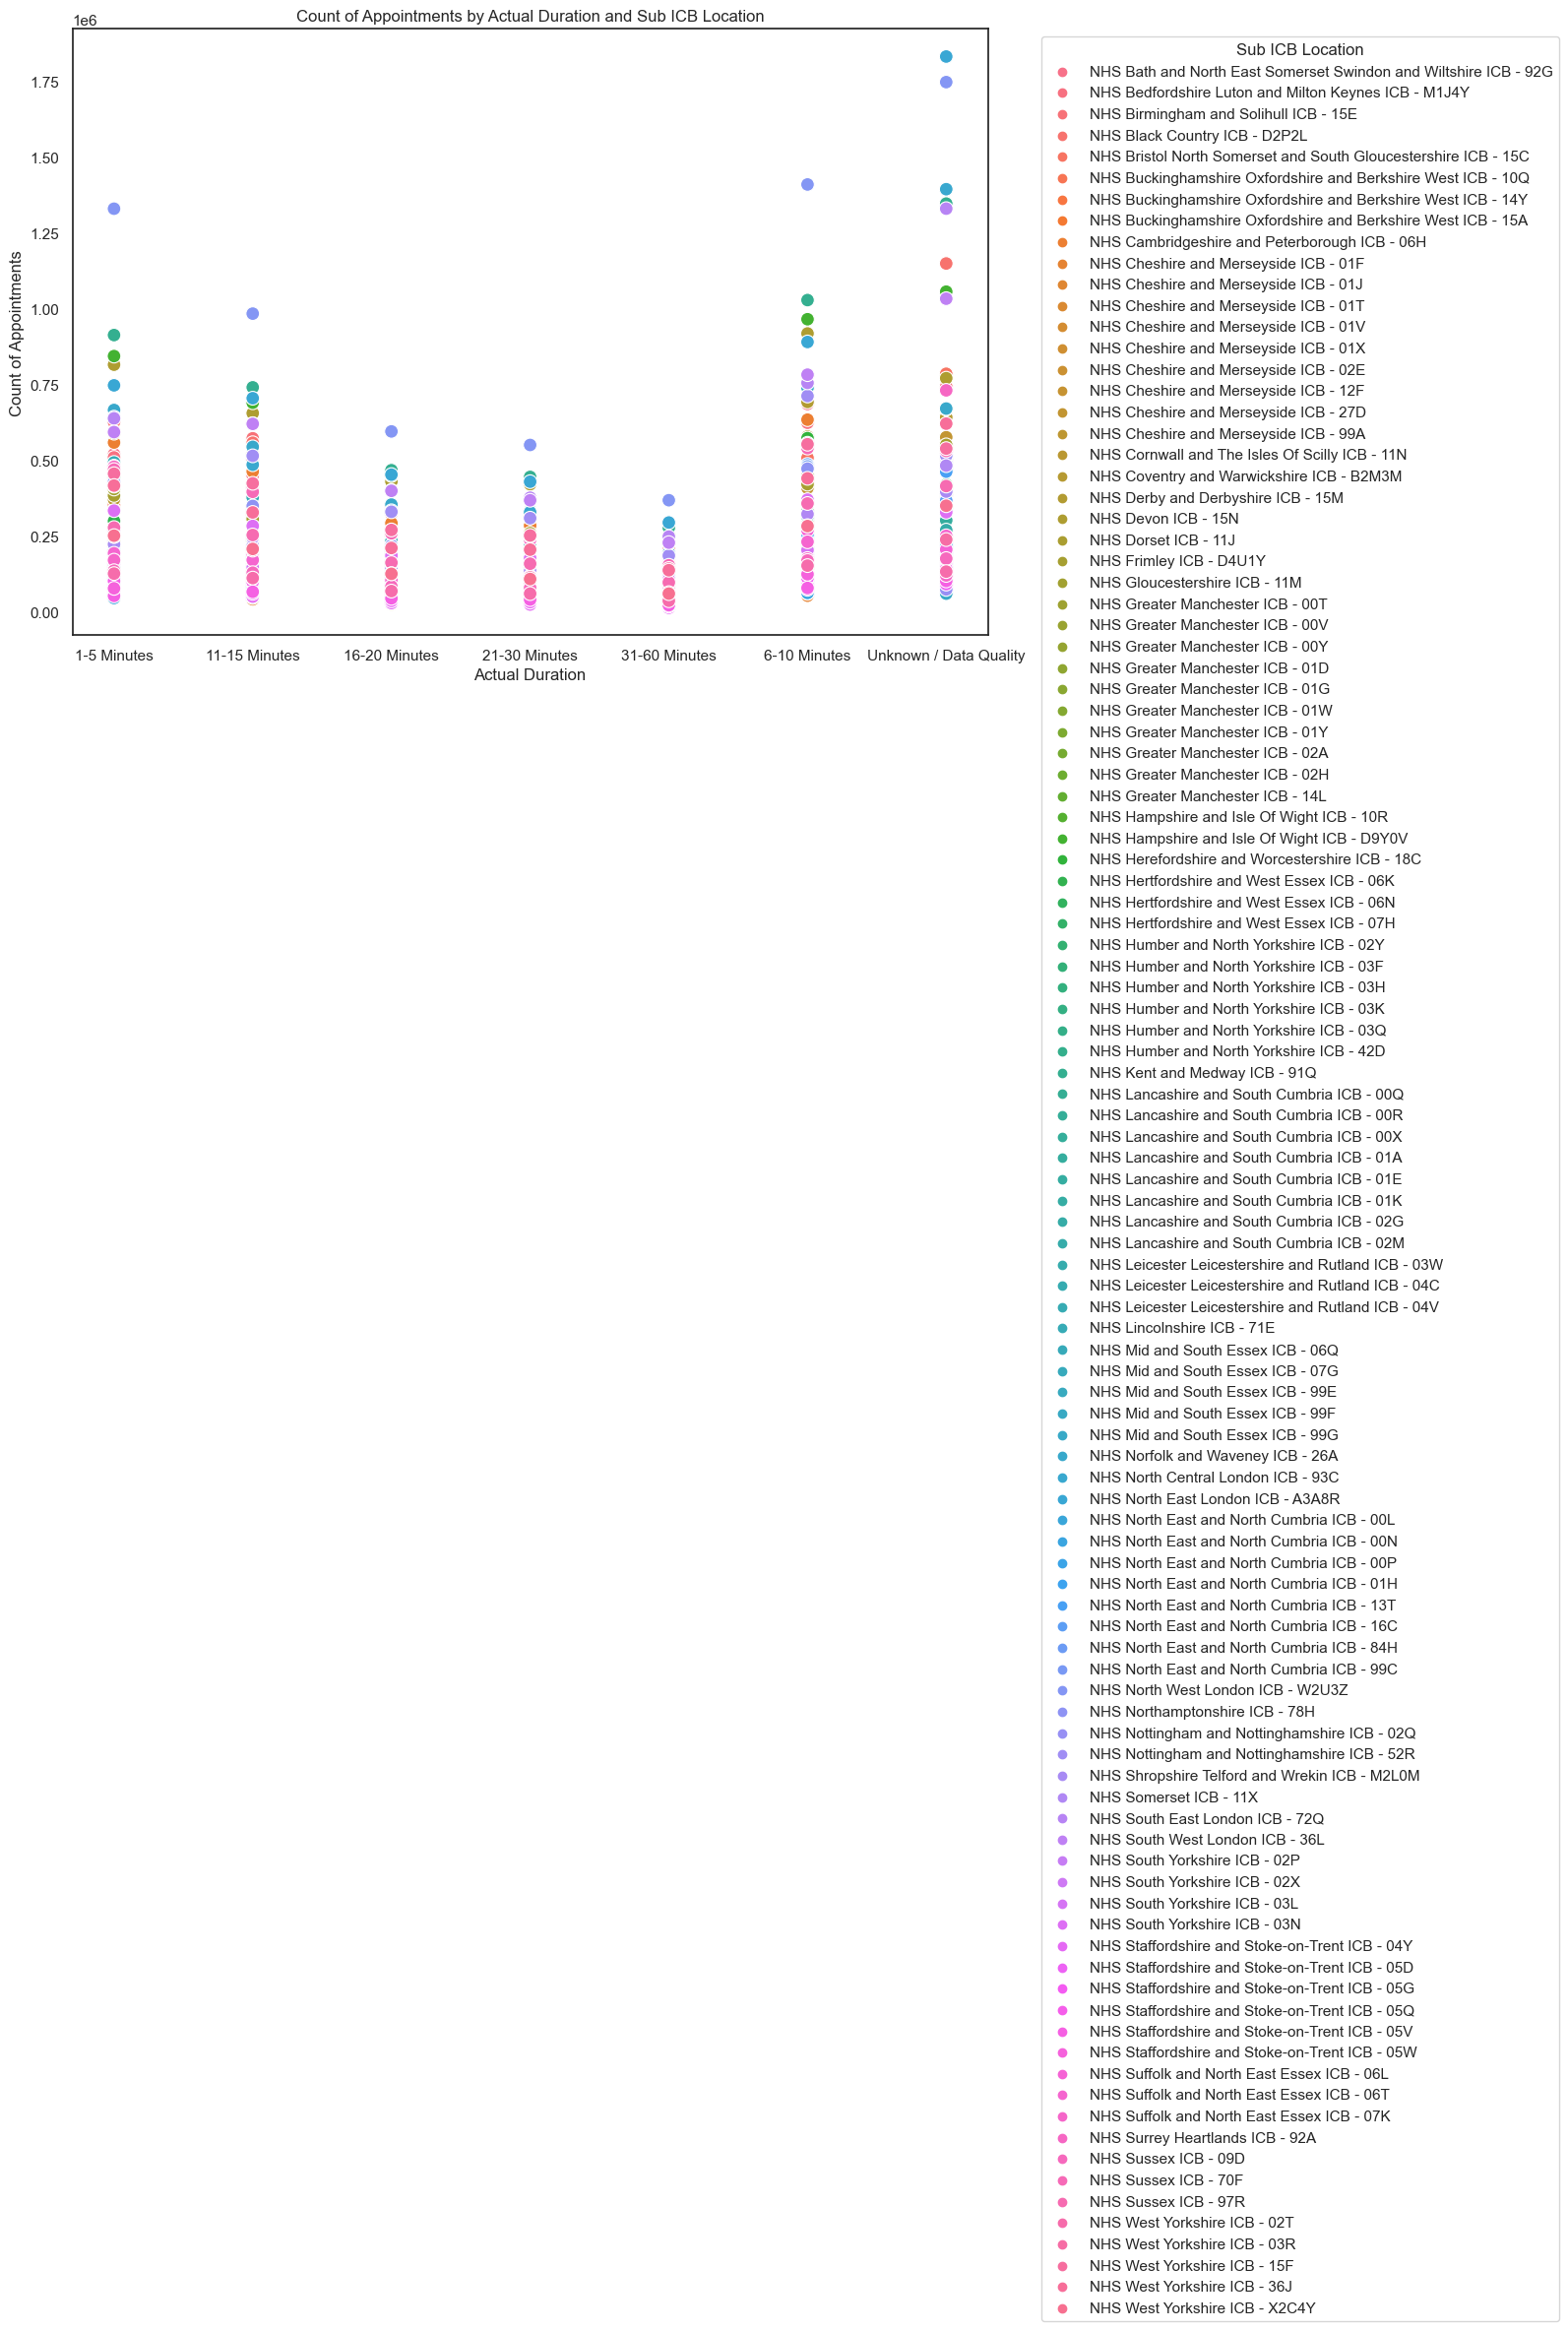

In [116]:
# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=grouped_ad1, x='actual_duration', y='count_of_appointments', hue='sub_icb_location_name', s=100)
plt.title('Count of Appointments by Actual Duration and Sub ICB Location')
plt.xlabel('Actual Duration')
plt.ylabel('Count of Appointments')
plt.legend(title='Sub ICB Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### c) How long patients have to wait for appointment with healthcare proffesionals?

In [117]:
# Create a data frame and group columns
grouped_ar2 = ar.groupby(['time_between_book_and_appointment', 'hcp_type'])['count_of_appointments'].sum().reset_index()

grouped_ar2

time_between_book_and_appointment              hcp_type  \
0                              1 Day                    GP   
1                              1 Day  Other Practice staff   
2                              1 Day               Unknown   
3                     15  to 21 Days                    GP   
4                     15  to 21 Days  Other Practice staff   
5                     15  to 21 Days               Unknown   
6                        2 to 7 Days                    GP   
7                        2 to 7 Days  Other Practice staff   
8                        2 to 7 Days               Unknown   
9                     22  to 28 Days                    GP   
10                    22  to 28 Days  Other Practice staff   
11                    22  to 28 Days               Unknown   
12                     8  to 14 Days                    GP   
13                     8  to 14 Days  Other Practice staff   
14                     8  to 14 Days               Unknown   
15                 More than 28 Days                    GP   
16                 More than 28 Days  Other Practice staff   
17                 More than 28 Days               Unknown   
18                          Same Day                    GP   
19                          Same Day  Other Practice staff   
20                          Same Day               Unknown   
21            Unknown / Data Quality                    GP   
22            Unknown / Data Quality  Other Practice staff   
23            Unknown / Data Quality               Unknown   

    count_of_appointments  
0                35368144  
1                30164068  
2                 2183885  
3                14024047  
4                27955762  
5                  730765  
6                64844646  
7                85515772  
8                 3434113  
9                 7806782  
10               17283014  
11                 446745  
12               29445328  
13               55866903  
14                1534288  
15                5327614  
16               17174182  
17                 549191  
18              222639135  
19              105504431  
20               14603605  
21                 194444  
22                 186403  
23                  21258

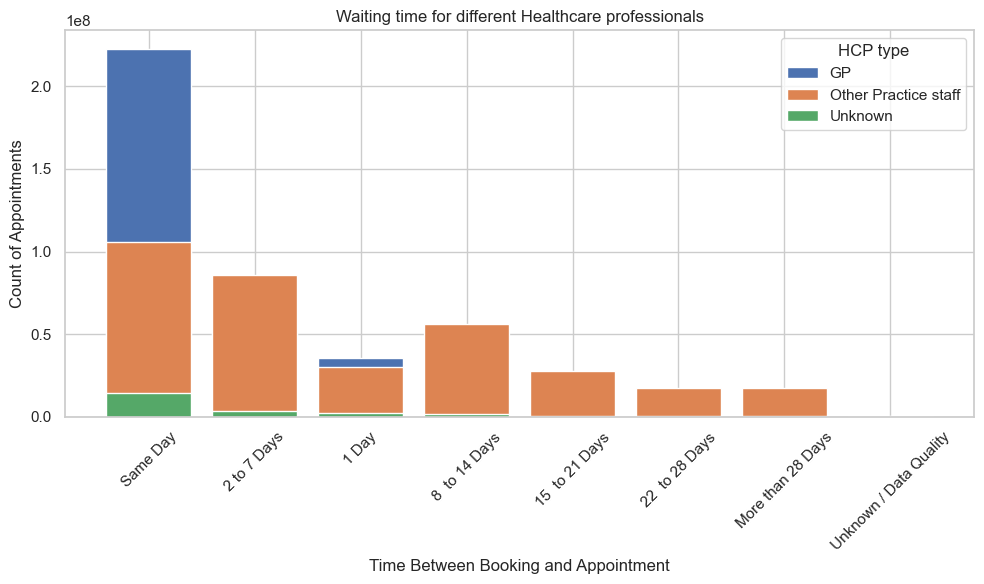

In [118]:
plt.figure(figsize=(10, 6))
# Using seaborn style
sns.set_style('whitegrid')

# Sorting data in descending order by 'count_of_appointments'
grouped_ar2_sorted = grouped_ar2.sort_values(by='count_of_appointments', ascending=False)

# Getting unique hcp values for legend
hcps = grouped_ar2_sorted['hcp_type'].unique()

# Creating bar plots for each hcp
for hcp in hcps:
    data = grouped_ar2_sorted[grouped_ar2_sorted['hcp_type'] == hcp]
    plt.bar(data['time_between_book_and_appointment'], data['count_of_appointments'], label=hcp)

# Adding labels and title
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Count of Appointments')
plt.title('Waiting time for different Healthcare professionals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='HCP type')

# Showing plot
plt.tight_layout()
plt.show()

### Plot for presentation

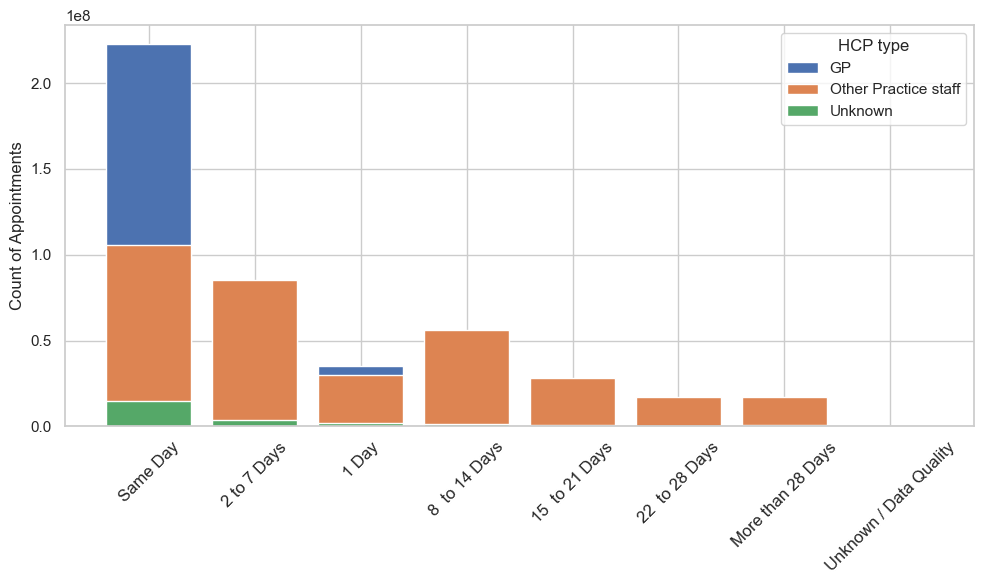

In [119]:
plt.figure(figsize=(10, 6))
# Using seaborn style
sns.set_style('whitegrid')

# Sorting data in descending order by 'count_of_appointments'
grouped_ar2_sorted = grouped_ar2.sort_values(by='count_of_appointments', ascending=False)

# Getting unique hcp values for legend
hcps = grouped_ar2_sorted['hcp_type'].unique()

# Creating bar plots for each hcp
for hcp in hcps:
    data = grouped_ar2_sorted[grouped_ar2_sorted['hcp_type'] == hcp]
    plt.bar(data['time_between_book_and_appointment'], data['count_of_appointments'], label=hcp)

# Adding labels and title
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability and increase font size
plt.legend(title='HCP type')

# Showing plot
plt.tight_layout()
plt.show()

## d) In which location patients cannot get appointment within 1 day?
We will check the location with lowest count of appointments with a waiting time 1 day.

In [120]:
# Group data and sum
grouped_ar3 = ar.groupby(['time_between_book_and_appointment', 'icb_ons_code'])['count_of_appointments'].sum().reset_index()

grouped_ar3

time_between_book_and_appointment icb_ons_code  count_of_appointments
0                               1 Day    E54000008                3383990
1                               1 Day    E54000010                1154122
2                               1 Day    E54000011                 534097
3                               1 Day    E54000013                 731427
4                               1 Day    E54000015                1224804
..                                ...          ...                    ...
331            Unknown / Data Quality    E54000058                   5479
332            Unknown / Data Quality    E54000059                   1797
333            Unknown / Data Quality    E54000060                   4276
334            Unknown / Data Quality    E54000061                   4884
335            Unknown / Data Quality    E54000062                  10150

[336 rows x 3 columns]

In [121]:
# Filter the DataFrame with 'time_between_book_and_appointment' as '1 Day'
filtered_df = grouped_ar3[grouped_ar3['time_between_book_and_appointment'] == '1 Day']

# Sort the filtered DataFrame by 'count_of_appointments' in descending order
sorted_df = filtered_df.sort_values(by='count_of_appointments', ascending=True)

sorted_df

time_between_book_and_appointment icb_ons_code  count_of_appointments
2                              1 Day    E54000011                 534097
21                             1 Day    E54000038                 629951
26                             1 Day    E54000043                 730996
3                              1 Day    E54000013                 731427
19                             1 Day    E54000036                 806523
38                             1 Day    E54000059                 820079
18                             1 Day    E54000034                 852238
6                              1 Day    E54000019                 924055
22                             1 Day    E54000039                 963131
24                             1 Day    E54000041                 981927
35                             1 Day    E54000056                1034520
23                             1 Day    E54000040                1042969
9                              1 Day    E54000024                1091484
31                             1 Day    E54000052                1092226
5                              1 Day    E54000018                1105766
8                              1 Day    E54000023                1109221
39                             1 Day    E54000060                1143840
1                              1 Day    E54000010                1154122
37                             1 Day    E54000058                1188745
4                              1 Day    E54000015                1224804
7                              1 Day    E54000022                1265056
11                             1 Day    E54000026                1320316
34                             1 Day    E54000055                1452519
10                             1 Day    E54000025                1495386
40                             1 Day    E54000061                1683392
20                             1 Day    E54000037                1741665
16                             1 Day    E54000031                1742099
13                             1 Day    E54000028                1742740
41                             1 Day    E54000062                1802828
28                             1 Day    E54000048                1871255
32                             1 Day    E54000053                1879118
27                             1 Day    E54000044                1899125
25                             1 Day    E54000042                2030075
17                             1 Day    E54000032                2060292
30                             1 Day    E54000051                2072444
15                             1 Day    E54000030                2277463
14                             1 Day    E54000029                2820420
36                             1 Day    E54000057                3252809
12                             1 Day    E54000027                3365107
0                              1 Day    E54000008                3383990
33                             1 Day    E54000054                3479816
29                             1 Day    E54000050                3916061

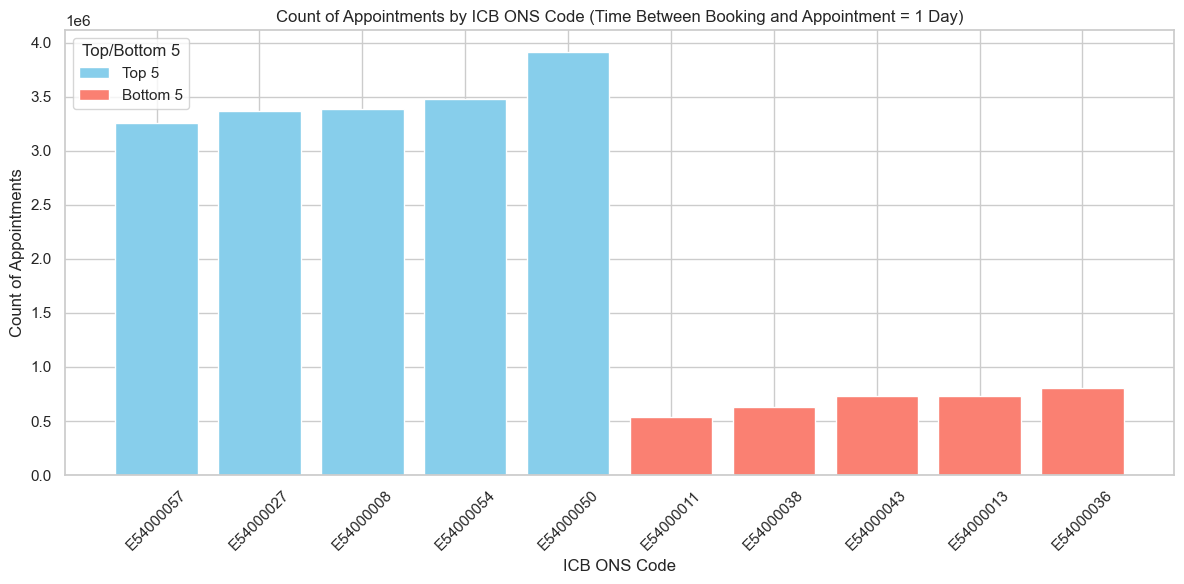

In [122]:
# Select the top and bottom 5 values in 'icb_ons_code' column
top_5_values = sorted_df.tail(5)
bottom_5_values = sorted_df.head(5)

plt.figure(figsize=(12, 6))

# Plotting bar plots for top 5 values
plt.bar(top_5_values['icb_ons_code'], top_5_values['count_of_appointments'], color='skyblue', label='Top 5')

# Plotting bar plots for bottom 5 values
plt.bar(bottom_5_values['icb_ons_code'], bottom_5_values['count_of_appointments'], color='salmon', label='Bottom 5')

# Adding labels and title
plt.xlabel('ICB ONS Code')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by ICB ONS Code (Time Between Booking and Appointment = 1 Day)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Top/Bottom 5', loc='upper left')
plt.tight_layout()
plt.show()

## Checking name of the location according to icb ons code

In [123]:
# Filtering ad data frame to look for name for the location with specific icb_ons_code
filtered_ad = ad[ad['icb_ons_code'] == 'E54000011'][['icb_ons_code', 'sub_icb_location_name']]
filtered_ad

icb_ons_code                          sub_icb_location_name
133644    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
133645    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
133646    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
133647    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
133648    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
...             ...                                            ...
135024    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
135025    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
135026    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
135027    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M
135028    E54000011  NHS Shropshire Telford and Wrekin ICB - M2L0M

[1385 rows x 2 columns]